<a href="https://colab.research.google.com/github/kirillkobychev/MLHSE/blob/lectures/5_%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations

## Раздел 1. Основы Matplotlib

Начнём наш разговор, пожалуй, с того, что, вообще говоря, вы, конечно, можете строить графики и использовать для применения визуализаций в вашей работе — любые программные средства и любые модули, которые вам удобны, — не обязательно Matplotlib, да и в принципе не обязательно библиотеки Python. В то же время мы со своей стороны на дисциплине предлагаем вам к изучению — и даже тратим на это довольно много времени — именно этот непростой инструмент. Почему же всё-таки так?

Библиотека Matplotlib — а вместе с тем и все расширяющие, и дополняющие её последующие библиотеки типа Seaborn — хотя и могут на первый взгляд казаться существенно сложнее того же хорошо знакомого нам Excel, — в то же время предоставляют гораздо большую гибкость; изложение становится более плавным, последовательным — например, как в этом ноутбуке, текст подкрепляется графиками и кодом; — а также появляется возможность визуализировать наборы данных такого объема, с которыми Excel в принципе не может работать. Последнее, возможно, является одним из наиболее критичных аргументов, особенно для ряда специализированных областей.

Так что давайте не будем тратить время: импортируем нашу библиотеку, пропишем магическую функцию, позволяющую отображать графики прямо в самом ноутбуке, и непосредственно приступим с вами к важному разговору про Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

[Куча примеров и best practices](https://matplotlib.org/gallery/index.html) по построению графиков.


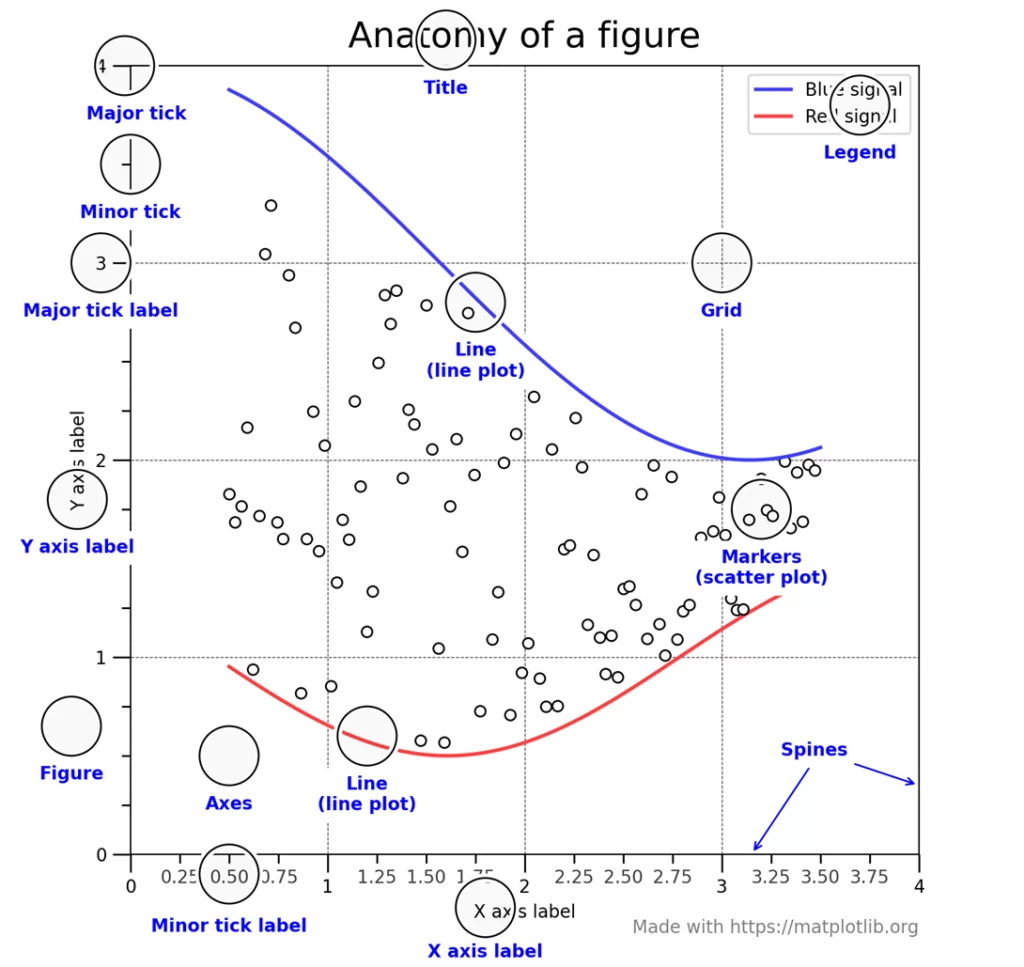

### Архитектура Matplotlib (для любопытных)

Matplotlib имеет три основных слоя:
* слой нижнего уровня (backend)
* слой рисунков
* слой скриптов

Слой нижнего уровня содержит три интерфейсных класса: канва рисунка (figure canvas), определяющая область рисунка, прорисовщик (renderer), умеющий рисовать на этой канве, и событие (event), обрабатывающее ввод пользователя вроде щелчков мыши. Слой рисунков знает, как рисовать с помощью Renderer'а и рисовать на канве. Все, что находится на рисунке Matplotlib, является экземпляром слоя рисунка (artist). Засечки, заголовок, метки – все это индивидуальные объекты слоя рисунков. Слой скриптов – это облегченный интерфейс, который очень полезен для ежедневного применения.

### Функция Plot и основные настройки

Самой базовой и простейшей визуализацией в Matplotlib, которую вы можете быстро и без каких-либо сложностей построить, почти ничего не зная про библиотеку, — является обычный линейный Plot. Именно на примере этого графика предлагается начать разбор концептуальных основ Matplotlib'а; а заодно в дополнение мы сможем рассмотреть основные параметры и настройки, которые в дальнейшем будут применяться практически в каждом графике, который можно построить.



Чтобы мы с вами сразу могли обсуждать всё на практике, давайте возьмём знакомую нам из математики функцию синуса и сгенерируем пока что синтетические данные для неё на отрезке от 0 до 3π. Это будет нашим первым тренировочным примером, разобравшись с которым, уже можно будет постепенно переходить к реальным данным.

In [ ]:
import numpy as np
import random

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

Что произошло в ячейке выше? Что будет храниться в переменных `x` и `y`?

Для того чтобы построить наш первый график, воспользовавшись функцией `plt.plot`, нам необходимо передать ей в качестве параметров минимум 2 аргумента: массив значений для оси x и массив значений для оси y.

Как и любая функция, осуществляющая визуализацию простого линейного Plot, данная функция вначале наносит на график точки, представляя их парами координат вида: ($x_1$; $y_1$), ($x_2$; $y_2$), ..., ($x_n$; $y_n$), — а затем просто аппроксимирует зависимость по ним с помощью непрерывной гладкой линии. Разумеется, чем больше точек вы укажете в рамках массивов для графика, тем плавнее и красивее получится эта линия, построенная программой.

Кроме того, из всего выше следует, что размерности `x` и `y` должны обязательно совпадать — без этого ничего просто не будет работать.

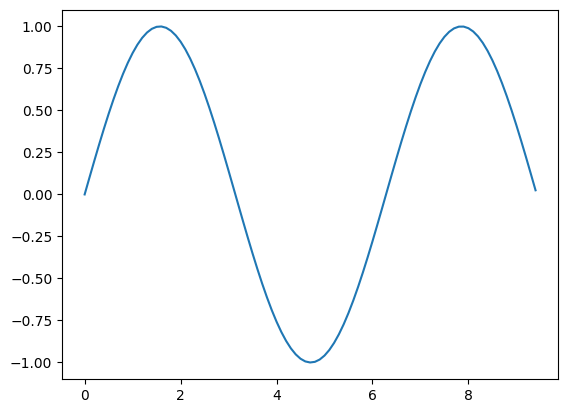

In [ ]:
plt.plot(x, y);

Ура! Мы построили наш первый график. Пока что ничего особо сложного, как вы можете видеть! :)

И он даже похож на то, что мы бы ожидали получить от синуса.. :)

В примере, рассмотренном выше, мы используем так называемый функциональный стиль визуализации в Matplotlib, который очень похож на стиль из Matlab (если вдруг кто-то знает такой пакет, активно использовавшийся ещё несколько лет назад). Идея этого функционального стиля заключается в том, что при построении визуализации мы оперируем глобальным объектом `plt` ("рисовалка") и все команды и действия осуществляем, обращаясь только к нему.

Существует также и альтернативный вариант — так называемый объектный стиль, — когда мы явно задаём и затем оперируем всей "фигурой" и "осями" для нашего графика.

К объектному стилю визуализации мы ещё сегодня вернёмся позднее, а пока что давайте в рамках функционального стиля рассмотрим функцию `plt.figure`. Данная команда в качестве параметров принимает такие свойства, как размер всего графика ("фигуры") — `figsize`; или цвет фона графика — `facecolor`; и множество других. С полным списком доступных параметров для `plt.figure` можно ознакомиться, например, [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).

Помимо этого в глобальном объекте `plt` доступны и другие методы: например, мы можем выставить графику заголовок с помощью `plt.title`, можем подписать оси с помощью `plt.xlabel` и `plt.ylabel`, а также сделать много чего ещё. Стоит отметить, что всё это оформление считается хорошим тоном при построении графиков.

Итак, давайте продолжим работать с нашим графиком синуса и постепенно будем его модифицировать, применяя к нему новые функции, параметры и используя новые детали оформления. Чтобы все изменения отслеживать было проще, давайте, начиная с ближайшей ячейки и далее, помечать обновленные и/или добавленные нами блоки, а также все прочие изменения — с помощью символов `###`.

Для начала укажем заголовок, нанесем подписи осей, а также настроим размер фигуры для более красивого отображения:

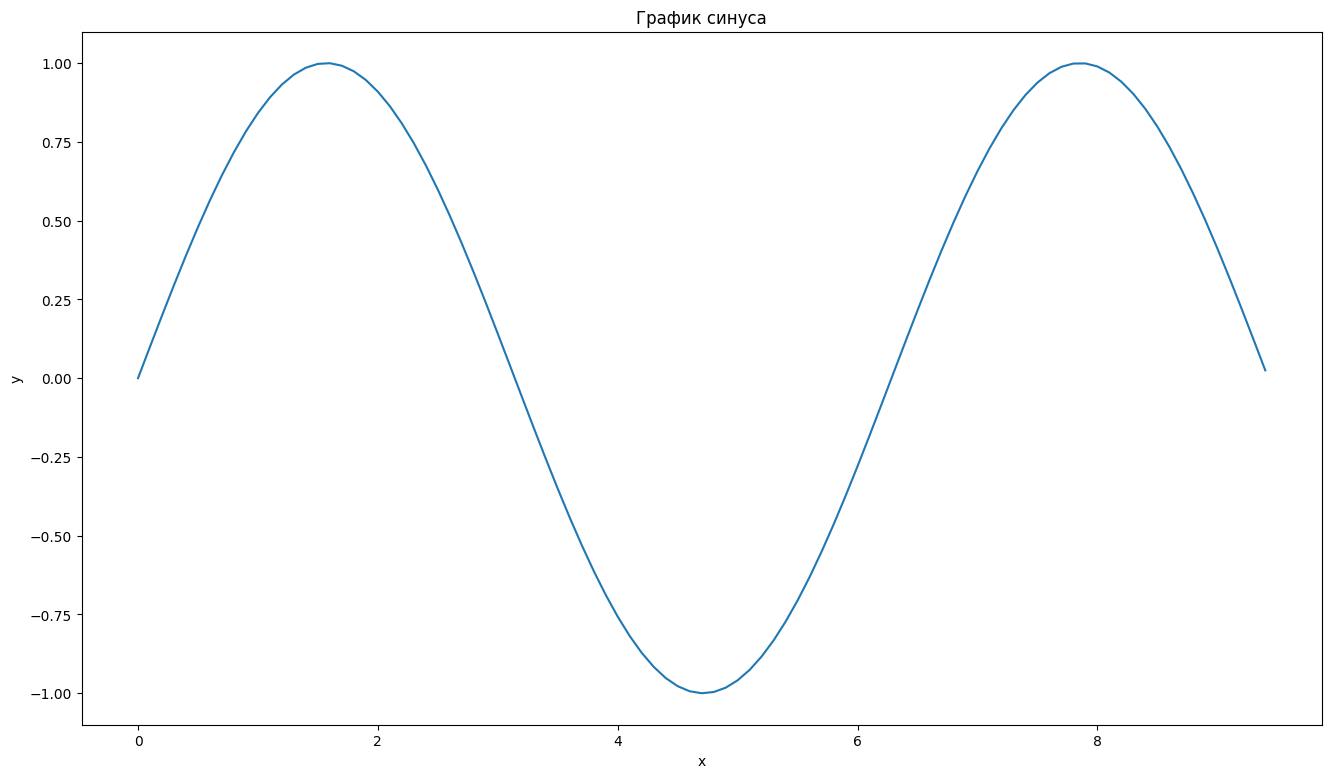

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

###
plt.figure(figsize=(16,9))
###

plt.plot(x, y)

###
plt.title("График синуса")
plt.xlabel("x")
plt.ylabel("y")

plt.show();
###

Вызывая несколько раз функцию `plt.plot` мы будем добавлять графики на полотно.

С помощью `plt.legend` мы можем указать легенду для наших графиков.

In [ ]:
# help(plt.legend)

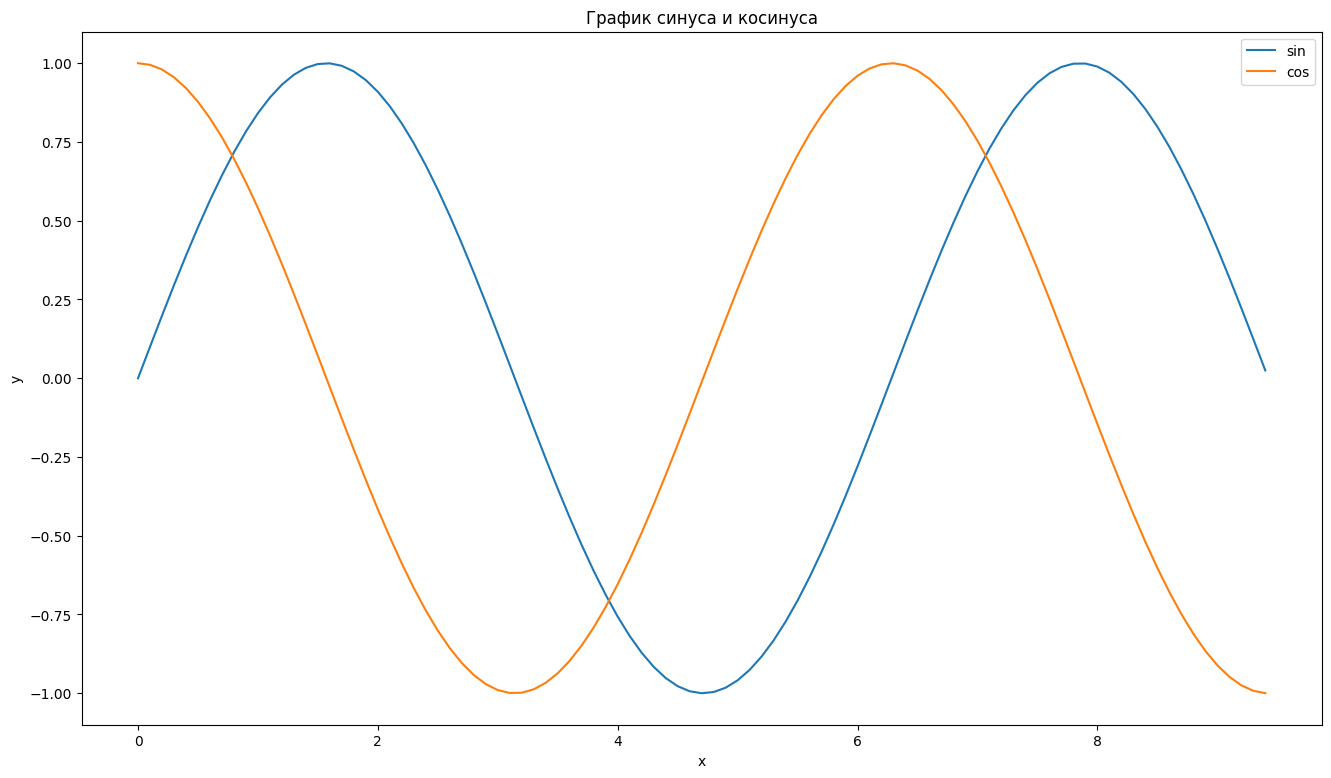

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
###
y_sin = np.sin(x)
y_cos = np.cos(x)
###

plt.figure(figsize=(16,9))
###
plt.plot(x, y_sin)
plt.plot(x, y_cos)
###
plt.title("График синуса и косинуса", )
plt.xlabel("x")
plt.ylabel("y")
###
plt.legend(['sin', 'cos'])
###

plt.show();

Мы также можем отобразить текст в произвольном месте нашего графика, для этого в plt.text передаем координату x и координату y левого верхнего угла блока с нашим текстом, а затем указываем сам текст и свойства для отображения текста.

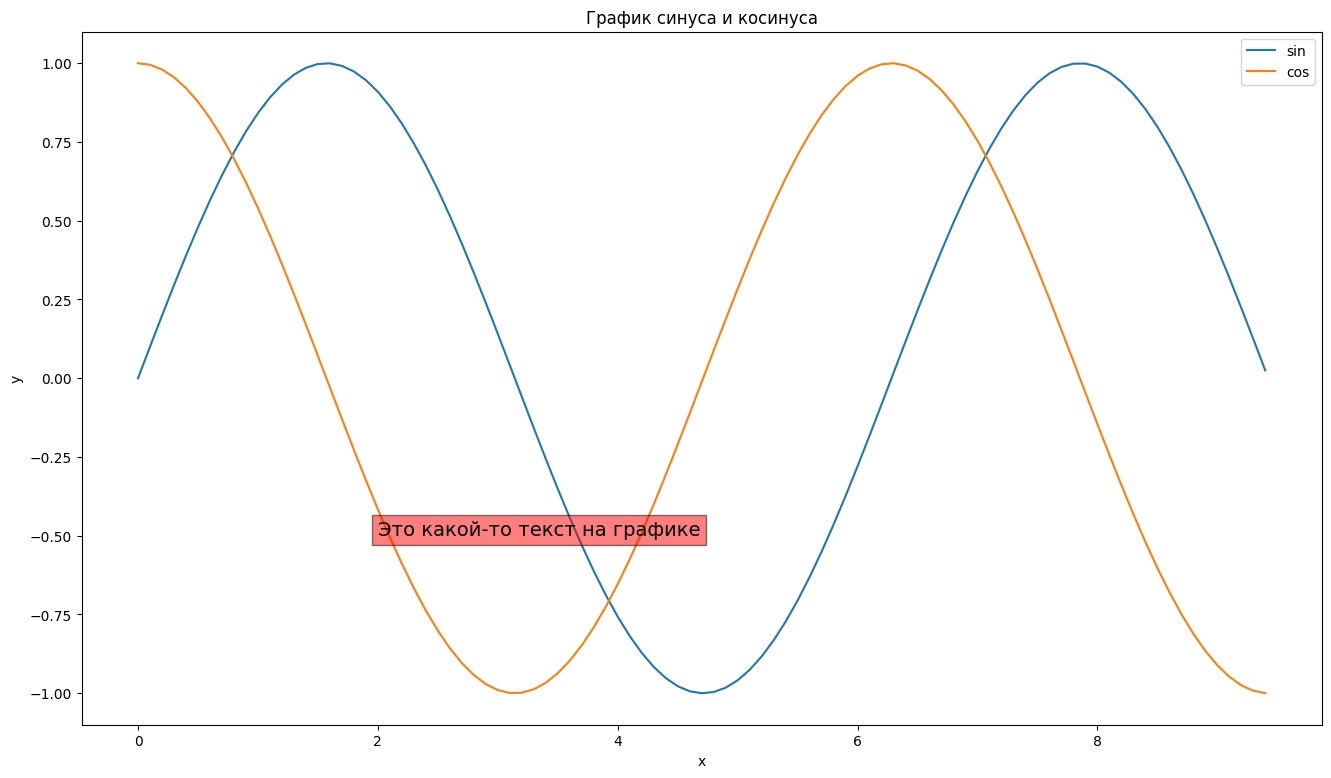

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])

###
plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5), fontsize=14)
###

plt.show()

Любопытная опция `linestyle` ("стиль линии" ) для `plt.plot`

In [ ]:
# help(plt.plot)

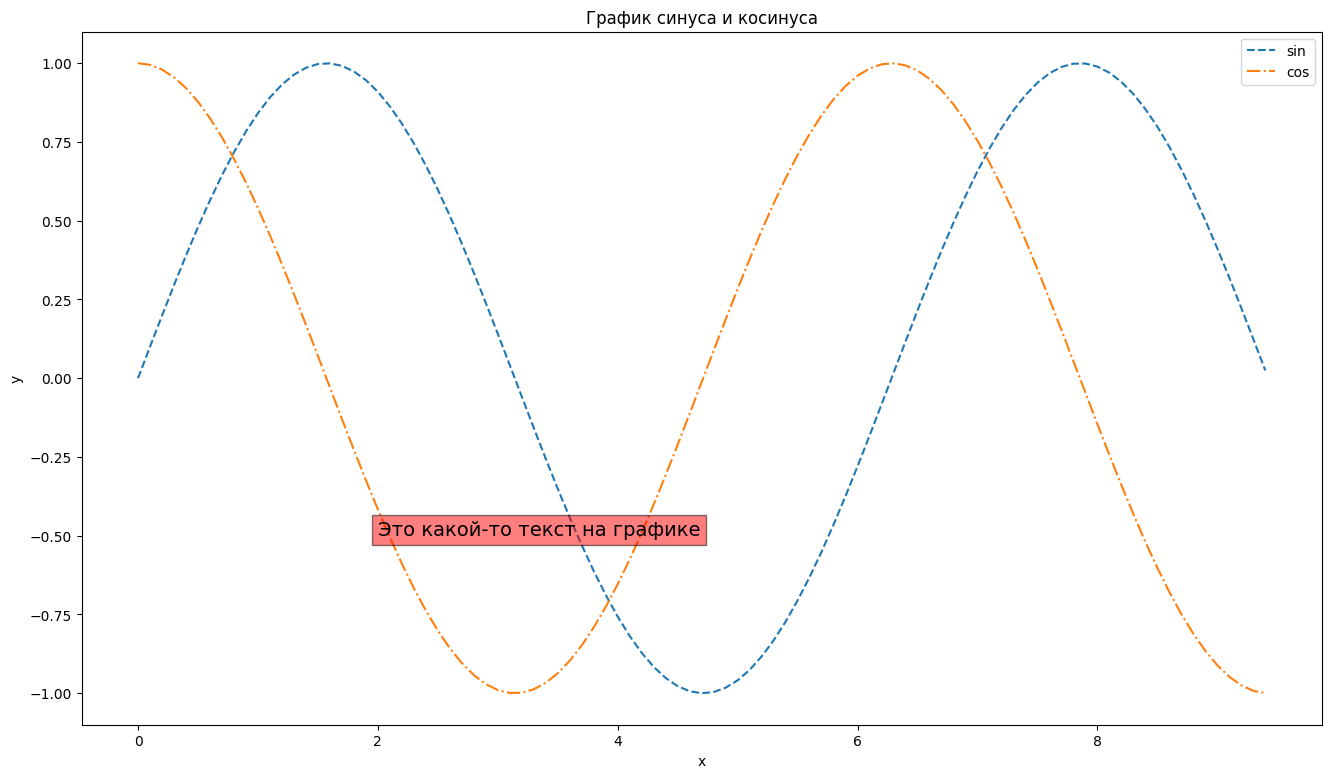

In [ ]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))

###
plt.plot(x, y_sin, linestyle='--')
plt.plot(x, y_cos, linestyle='dashdot')
###

plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])
plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5), fontsize=14)
plt.show()

Можно также поменять толщину линии с помощью linewidth и ее прозрачность с помощью alpha. Прозрачность доступна и для других функций для отрисовки. Эта опция полезна тогда, когда у вас происходит существенное наложение одного графика на другой.

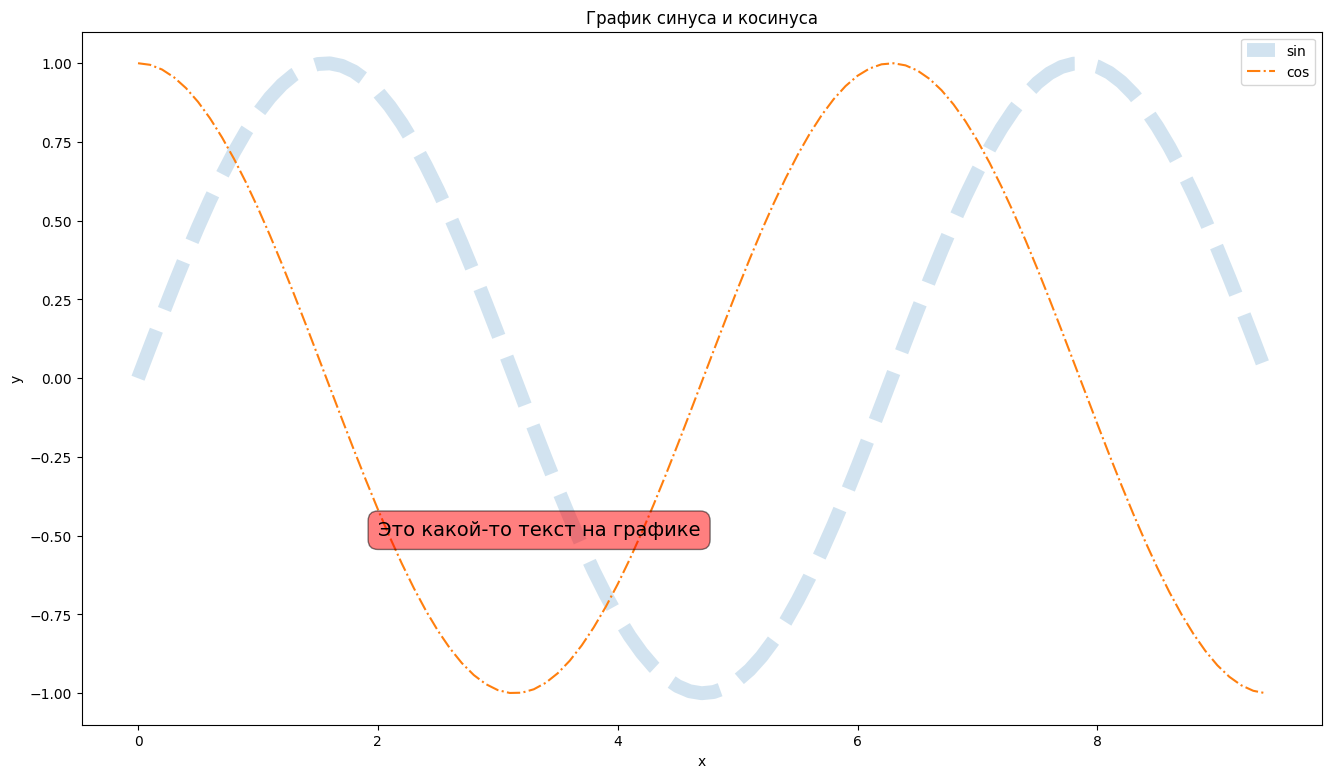

In [ ]:
# Изменение толщины линии и прозрачности
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(16,9))

###
plt.plot(x, y_sin, linestyle='--', linewidth=10, alpha=0.2)
###

plt.plot(x, y_cos, linestyle='dashdot')
plt.title("График синуса и косинуса")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['sin', 'cos'])

###
plt.text(2, -0.5, 'Это какой-то текст на графике', bbox=dict(facecolor='red', alpha=0.5, boxstyle = 'round,pad=0.5'), fontsize=14)
###

plt.show()

Полный набор опций для `plt.plot()` вы можете найти [здесь](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html).

### Scatter plot

Рассмотрим другие функции для отрисовки. Например, `plt.scatter` также принимает на вход список x и y, но не соединяет точки друг с другом.

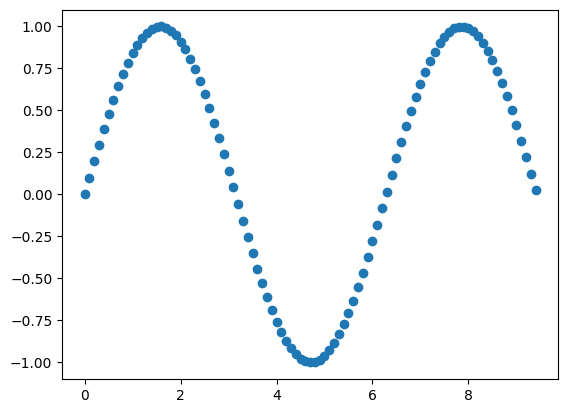

In [ ]:
plt.scatter(x, y_sin);

Мы можем, например, менять форму точки

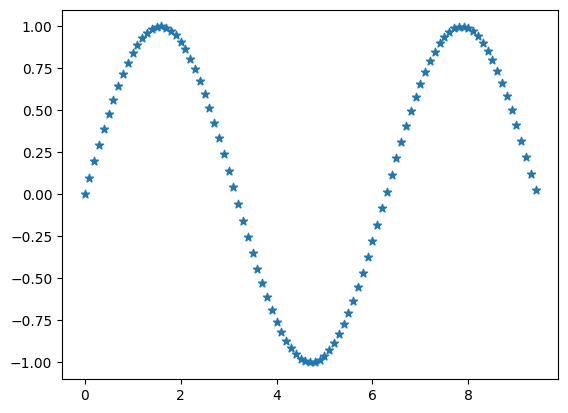

In [ ]:
plt.scatter(x, y_sin, marker='*',);

Если мы передадим в опции s список такого же размера, что x и y, то у нас будет меняться размер точек в соответствии с тем, который мы укажем

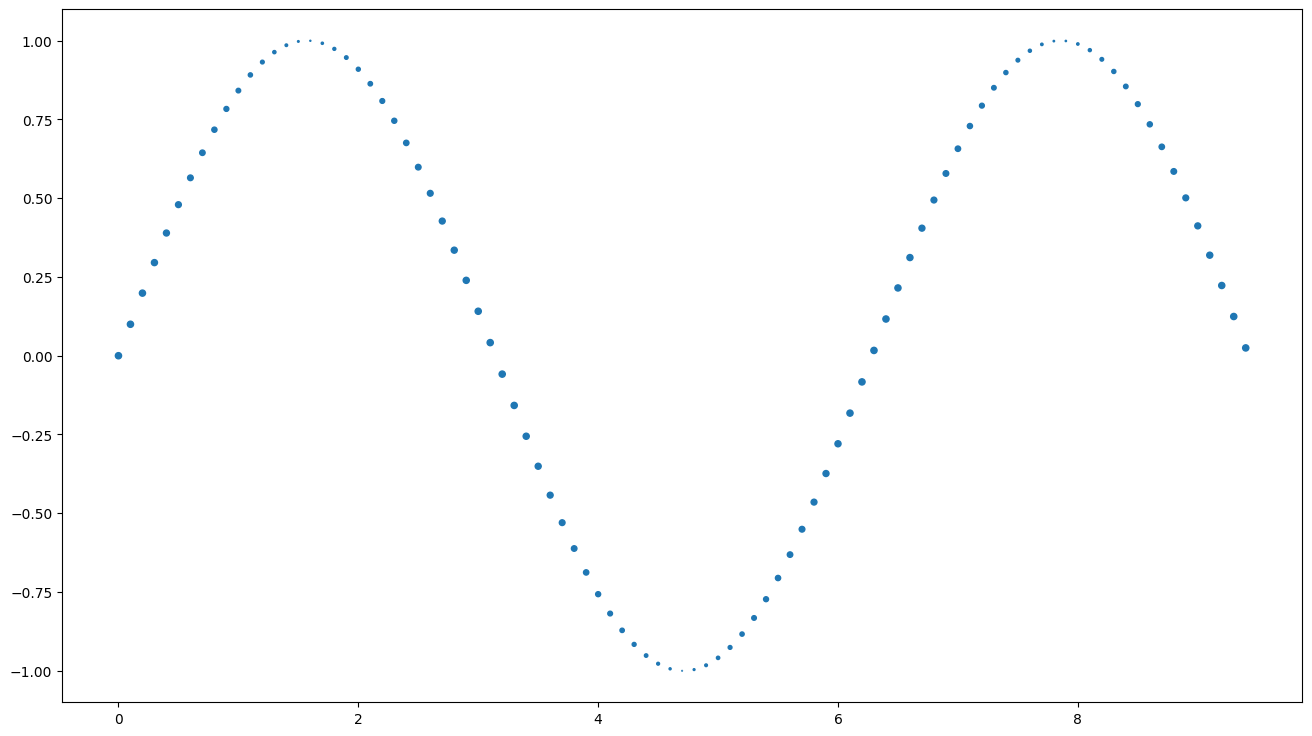

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(x, y_sin, s=np.abs(y_cos)*20);

Аналогично, мы можем менять цвет точек с помощью параметра `c`

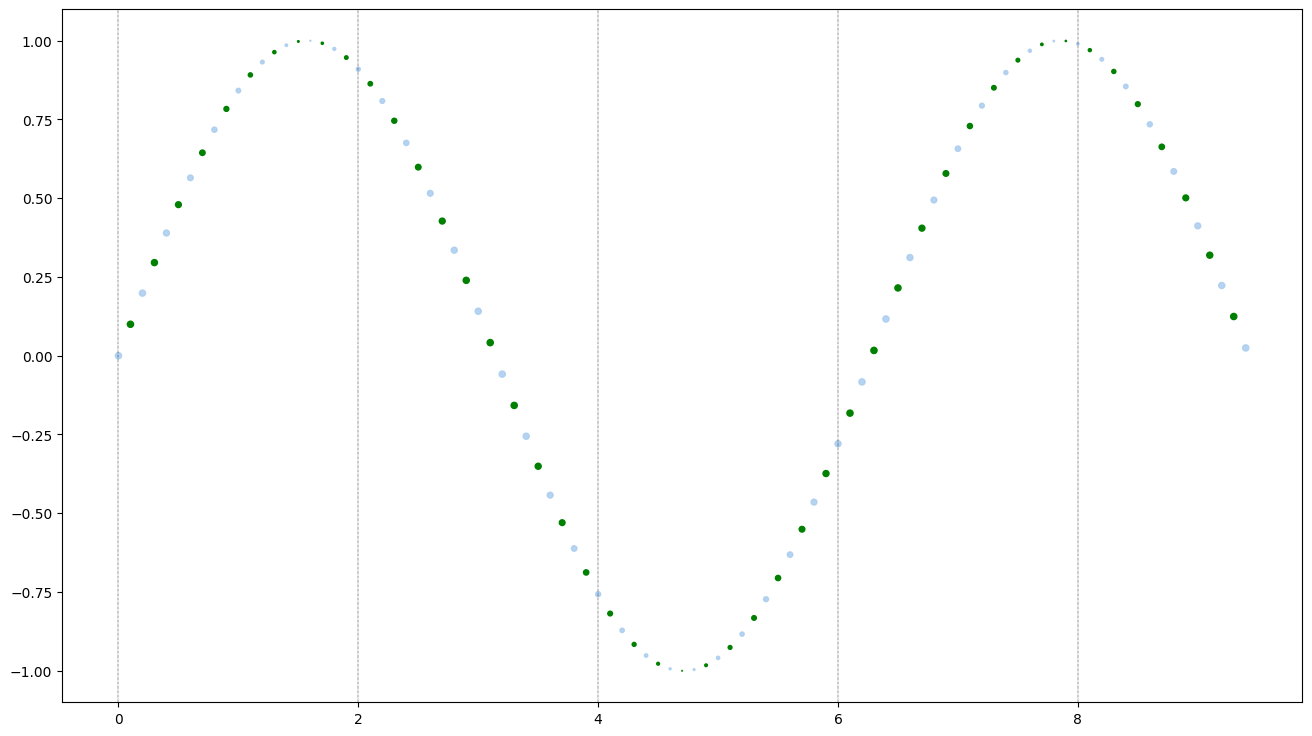

In [ ]:
plt.figure(figsize=(16,9))
colors_glossary = ['#ABCDEFDD', 'green']

colors = [colors_glossary[i % 2] for i in range(x.shape[0])]
plt.scatter(x, y_sin, s=np.abs(y_cos)*20, c=colors)

plt.grid(axis = 'x', color='black', linestyle='-.', linewidth=0.3)
plt.show()

### Другие графики Matplotlib

`plt.bar` отображает столбчатую диаграмму

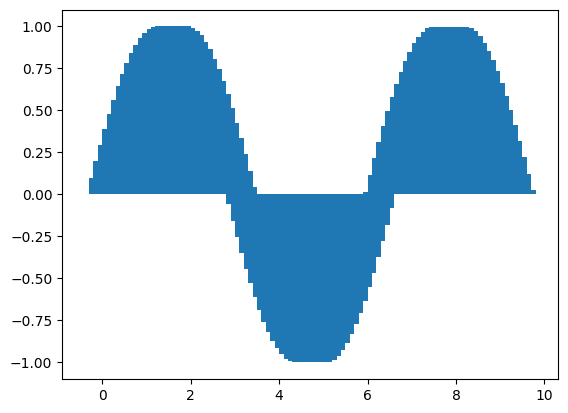

In [ ]:
plt.bar(x, y_sin);

#### Вопрос

Чем отличается barplot от гистограммы?

`plt.hist` принимает всего один список на вход, и отрисовывает частоту встречаемости значений в списке по интервалам (бакетам или бинам)

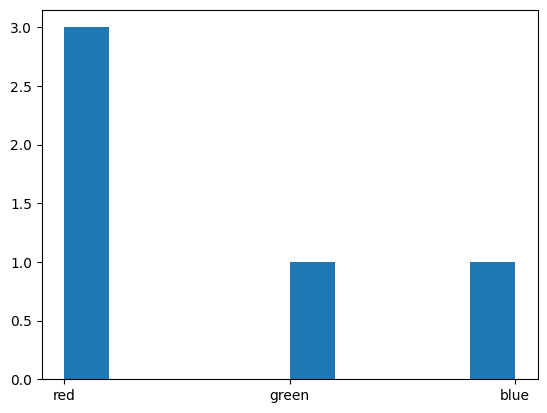

In [ ]:
lst = ['red', 'green', 'red', 'red', 'blue']

plt.hist(lst);

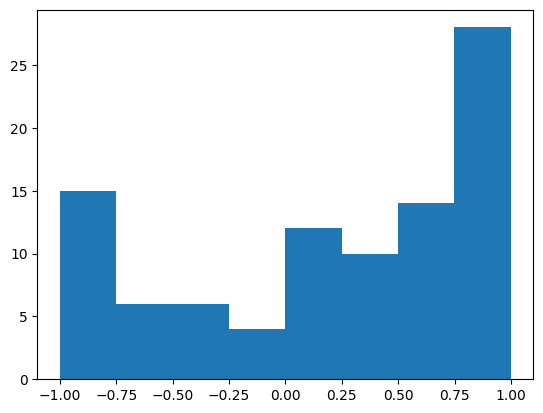

In [ ]:
plt.hist(y_sin, bins='auto'); # bins регулирует число столбиков

Если мы передадим параметр `density=True`, то получим нормированную гистограмму, то есть некоторого рода оценку плотности вероятности встречаемости значений нашего списка. Таким образом "площадь под графиком" будет равна 1.

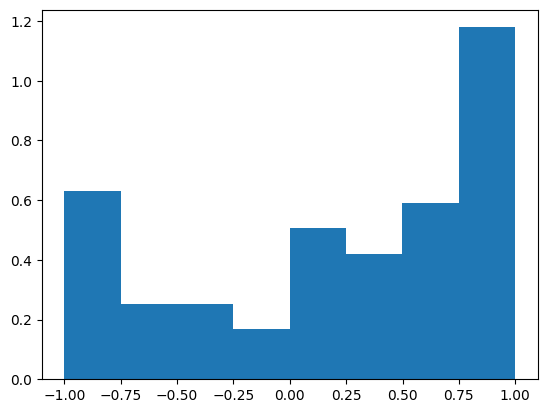

In [ ]:
plt.hist(y_sin, bins='auto', density=True);

#### Маркеры с условием*

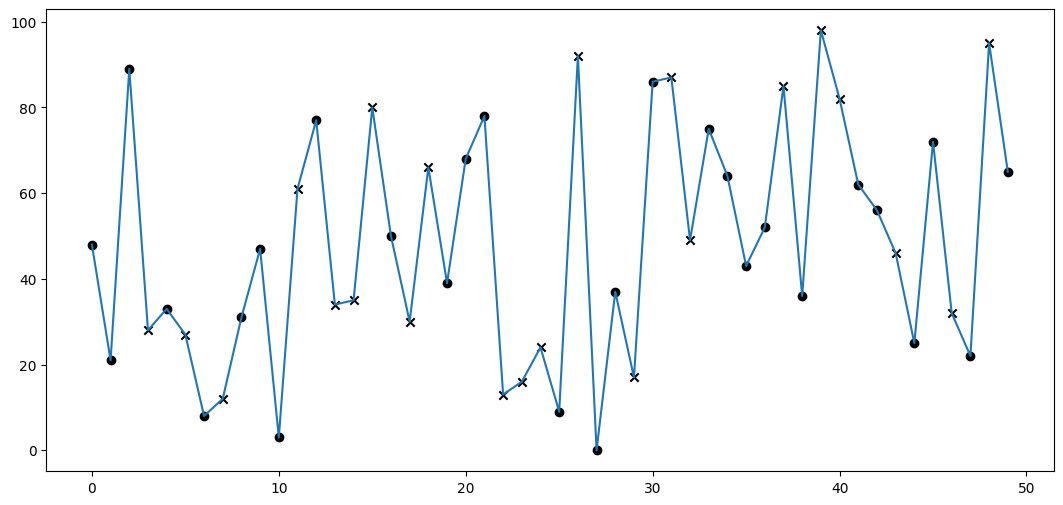

In [ ]:
###These are 100 random numbers
randomlist = random.sample(range(0, 100), 100)

###This is an array with 50 rows and 2 columns
arr = np.array(randomlist)
arr_re = arr.reshape(50,2)

### This is a lineplot of column 1 with different markers dependent on the value of column 2
figure, ax = plt.subplots(figsize=(13, 6))

# plot column 1
plt.plot(arr_re[:,0])

# scatter plot the markers based on a condition
for i in range(0,50,1):
    if arr_re[i,1] > 50:
        ax.scatter(i,arr_re[i,0], color="black", marker='o', label='1880-1999')
    else:
        ax.scatter(i,arr_re[i,0], color="black", marker='x', label='1880-1999')

plt.show();

#### Полезные ссылки

Больше информации и всевозможных параметров вы можете найти в документации:
* [`plt.scatter`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html)

* [`plt.bar`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

* [`plt.hist`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)

### Функциональный и объектный подход в Matplotlib

С помощью глобального объекта plt мы можем рисовать несколько пар осей на одном "полотне". Как уже упоминалось, это представляет собой так называемый первый или функциональный подход.

plt.subplot принимает первым параметром кол-во строк сетки, вторым кол-во столбцов сетки, а последний параметр устанаваливает ту пару осей с которой мы работаем сейчас.

Рекомендую потренироваться с этим примером самостоятельно.

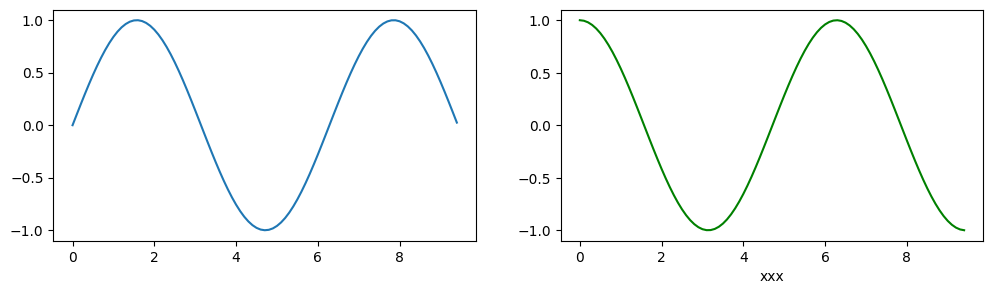

In [ ]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1) # с этого момента рисуем на паре осей 1
#
#
plt.plot(x, y_sin)
#
#
plt.subplot(1, 2, 2) # с этого момента рисуем на паре осей 2
#
#
plt.plot(x, y_cos, c = 'green')
plt.xlabel('xxx')
#
#
plt.show()

Ниже мы покажем альтернативный способ отображать несколько графиков на одном полотне. Здесь используется так называемый объектный интерфейс, который мы уже упоминали выше.

[plt.subplots()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) также принимает кол-во строк и столбцов, а также все те параметры, что принмает `plt.figure()`. Возвращает два объекта: объект фигуры и набор объектов осей в виде numpy массива размерности кол-во строк на кол-во столбцов.

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(16, 9))

In [ ]:
# print(axes[0][0], axes[0][1], sep = '\n')
# print(fig)

In [ ]:
# axes.ravel()

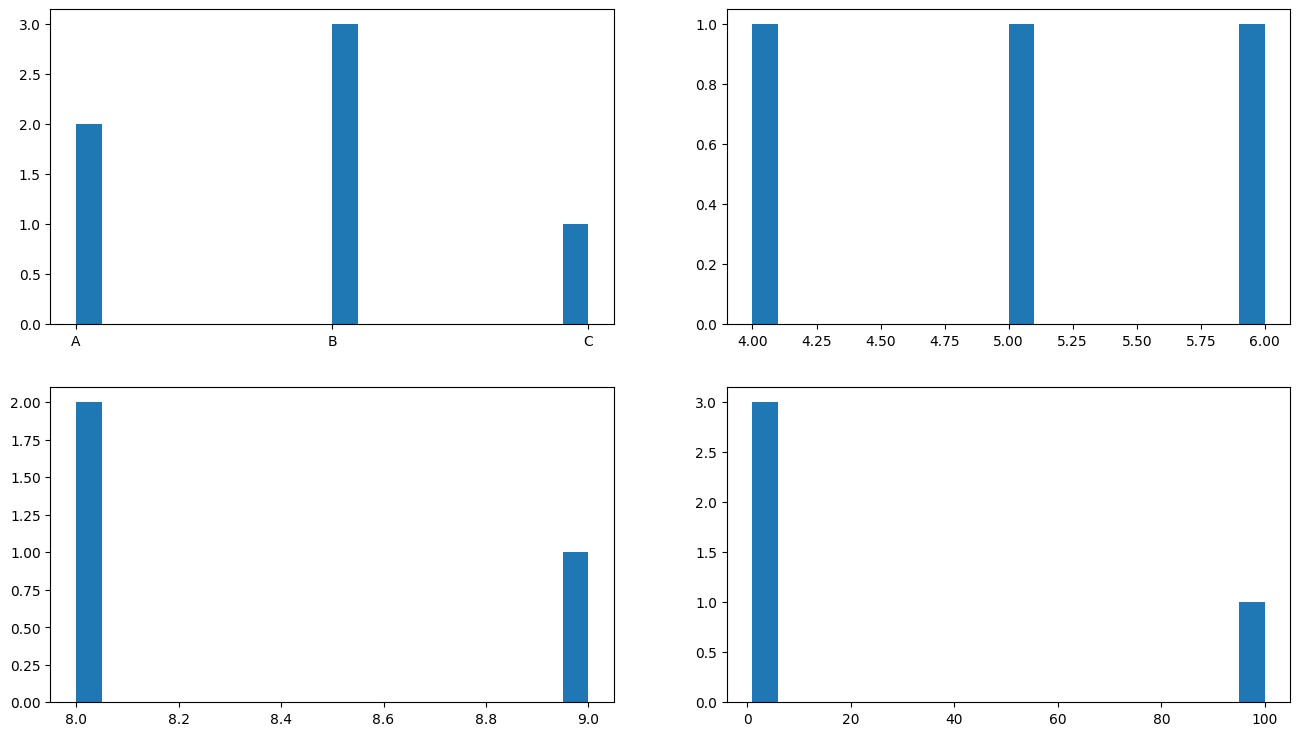

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

l = [['A','B','B','C','B','A'], [4,5,6], [8,8,9], [100,1,2,3]]

# ax[0].hist(...)
# ax[1].hist(...)
# ax[2].hist(...)
# ax[3].hist(...)

for idx, ax in enumerate(axes.ravel()):
  ax.hist(l[idx], bins = 20)

### Задание для самостоятельного решения (объектный подход в Matplotlib)

Выведите 4 графика сеткой 2х2 (2 в первой строке, 2 во второй строке), которые представляют собой 4 математические функции для объекта оси `x`, заданного в коде раннее: синус, косинус, тангенс, экспонента. Цвета для графиков должны быть соответственно следующими: красный, синий, зеленый, пурпурный. Вывод графиков необходимо осуществить циклом и использовать объектный подход Matplotlib (`plt.subplots`, `fig`, `axes`)

In [ ]:
# Ваш код здесь
...

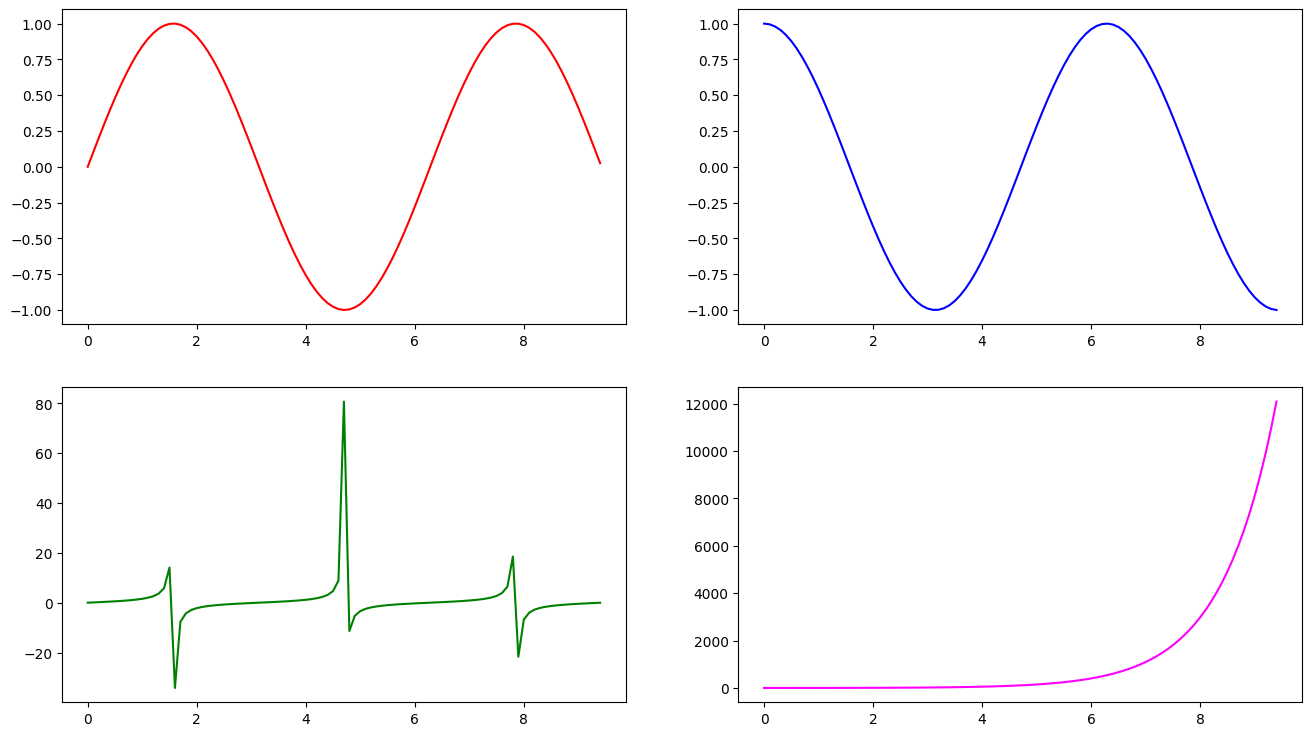

In [ ]:
# То что должно получится

#### Решение

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

colors = ['red', 'blue', 'green', 'fuchsia']
l = [np.sin, np.cos, np.tan, np.exp]

for idx, ax in enumerate(axes.ravel()):
    ax.plot(x, l[idx](x), c = colors[idx])
    ax.set_title(l[idx].__name__)

plt.show()

## Раздел 3. Matplotlib на реальных данных (BTC/USD and Money Supply)



Ну что же — пришло время Make visualizations great again :)



* [What is money supply?](https://www.khanacademy.org/economics-finance-domain/ap-macroeconomics/ap-financial-sector/definition-measurement-and-functions-of-money-ap/v/money-supply-m0-m1-and-m2)

  The United States Money Supply M0 is the most liquid measure of the money supply including coins and notes in circulation and other assets that are easily convertible into cash. Money Supply M0 and M1, are also known as narrow money.

* [What is bitcoin?](https://www.investopedia.com/terms/b/bitcoin.asp)

In [ ]:
import pandas as pd

In [ ]:
BTC_USD = 'https://github.com/evgpat/datasets/raw/refs/heads/main/BTC-USD.csv'
MONEY_SUPPLY = 'https://github.com/evgpat/datasets/raw/refs/heads/main/historical_country_United_States_indicator_Money_Supply_M0.csv'

In [ ]:
btc_usd = pd.read_csv(BTC_USD)
money_supply = pd.read_csv(MONEY_SUPPLY)

In [ ]:
btc_usd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...
74,2020-12-01,19633.769531,29244.876953,17619.533203,29001.720703,29001.720703,1212259707946
75,2021-01-01,28994.009766,41946.738281,28722.755859,33114.359375,33114.359375,2155904438233
76,2021-02-01,33114.578125,58330.570313,32384.228516,45137.769531,45137.769531,2267152936675
77,2021-03-01,45159.503906,61683.863281,45115.093750,58870.894531,58870.894531,893379837811


In [ ]:
btc_usd.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


#### Преобразование столбца с датами

In [ ]:
btc_usd = btc_usd.astype({"Date": "datetime64[s]"})
btc_usd

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...
74,2020-12-01,19633.769531,29244.876953,17619.533203,29001.720703,29001.720703,1212259707946
75,2021-01-01,28994.009766,41946.738281,28722.755859,33114.359375,33114.359375,2155904438233
76,2021-02-01,33114.578125,58330.570313,32384.228516,45137.769531,45137.769531,2267152936675
77,2021-03-01,45159.503906,61683.863281,45115.093750,58870.894531,58870.894531,893379837811


In [ ]:
btc_usd.dtypes

,0
Date,datetime64[s]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
money_supply.head()

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Money Supply M0,1959-01-31T00:00:00,50463,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
1,United States,Money Supply M0,1959-02-28T00:00:00,49805,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
2,United States,Money Supply M0,1959-03-31T00:00:00,49733,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
3,United States,Money Supply M0,1959-04-30T00:00:00,50058,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
4,United States,Money Supply M0,1959-05-31T00:00:00,50112,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00


In [ ]:
money_supply.dtypes

,0
Country,object
Category,object
DateTime,object
Value,int64
Frequency,object
HistoricalDataSymbol,object
LastUpdate,object


In [ ]:
money_supply.astype({"DateTime": "datetime64[s]"})

,Country,Category,DateTime,Value,Frequency,HistoricalDataSymbol,LastUpdate
0,United States,Money Supply M0,1959-01-31,50463,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
1,United States,Money Supply M0,1959-02-28,49805,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
2,United States,Money Supply M0,1959-03-31,49733,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
3,United States,Money Supply M0,1959-04-30,50058,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
4,United States,Money Supply M0,1959-05-31,50112,Monthly,UNITEDSTAMONSUPM0,2015-04-25T21:12:00
...,...,...,...,...,...,...,...
740,United States,Money Supply M0,2020-09-30,4880400,Monthly,UNITEDSTAMONSUPM0,2020-10-17T10:11:00
741,United States,Money Supply M0,2020-10-31,4917100,Monthly,UNITEDSTAMONSUPM0,2020-11-14T10:08:00
742,United States,Money Supply M0,2020-11-30,5093100,Monthly,UNITEDSTAMONSUPM0,2020-12-12T10:07:00
743,United States,Money Supply M0,2020-12-31,5206600,Monthly,UNITEDSTAMONSUPM0,2021-01-16T10:11:00


In [ ]:
money_supply['DateTime'].to_numpy().astype('datetime64[D]')

#### Строим первый график

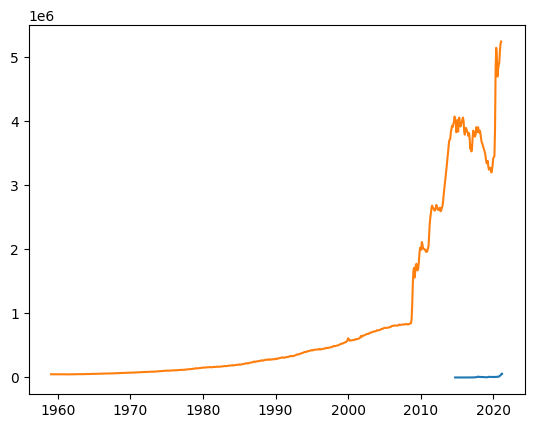

In [ ]:
money_supply_date = money_supply['DateTime'].to_numpy().astype('datetime64[D]')
money_supply_value = money_supply['Value'].to_numpy()
btc_usd_date = btc_usd['Date'].to_numpy().astype('datetime64[D]')
btc_usd_close = btc_usd['Close'].to_numpy()

plt.plot(btc_usd_date, btc_usd_close)
plt.plot(money_supply_date, money_supply_value)

plt.show();

Что скажете про такой график? :)

Красиво? :) Репрезентативно? :)

### Улучшение и оптимизация графиков

Итак, представляем вашему вниманию 10 в меру абстрактных шагов, которые помогут значительно улучшить ваши визуализации и проапгрейдить ваш скилл в Matplotlib

1. Вносите ясность — что вообще изображено?
2. Сравнивайте — располагаем связанную информацию рядом
3. Упрощайте — действительно ли нужны все точки, чтобы передать сообщение?
4. Фокусируйте внимание — нужен ли весь диапазон значений, имеет ли это смысл?
5. Поощряйте вопросы — можно выделить интересные ответы на возникающие вопросы прямо на графике
6. Пытайтесь ответить на вопрос “почему” — из графика должна в идеале быть понятно мысль без каких-либо комментариев
7. Оставляйте возможность валидировать визуализацию — можно оставить у нескольких точек подписи значений
8. Делайте разные визуализации — нет универсального типа визуализации, ищите то, что подходит лучше всего
9. Здоровый скептицизм — приводите референсы, ссылки. Спрашивайте других людей понятно или им что-то из графика
10. Детализируйте — самые интересные моменты, возможно, стоит рассмотреть отдельно


Ну что же, будем исправлять наш график по порядку, по шагам. Будем отмечать плюсиком, что добавили/исправили, чтобы нагляднее отслеживать все изменения.

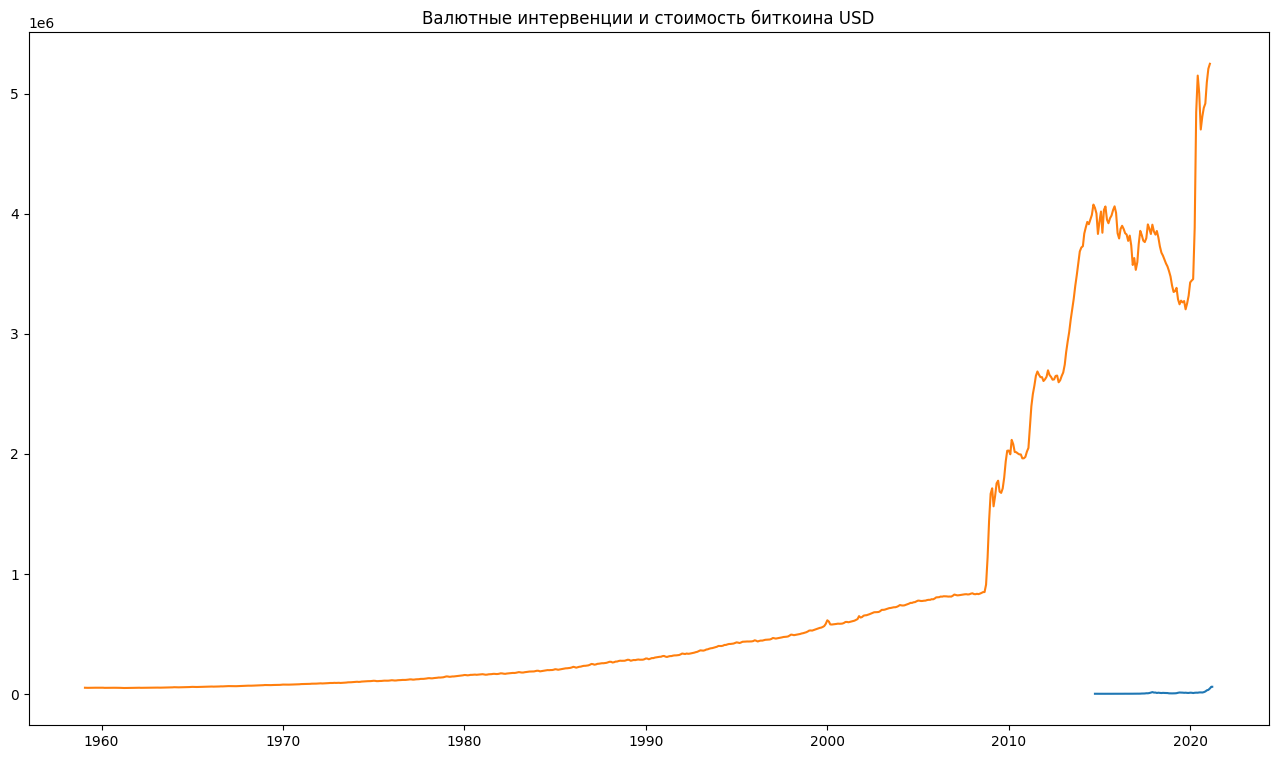

In [ ]:
# 1
plt.figure(figsize=(16,9)) # +

plt.plot(btc_usd_date, btc_usd_close)
plt.plot(money_supply_date, money_supply_value)

plt.title("Валютные интервенции и стоимость биткоина USD") # +

plt.show()

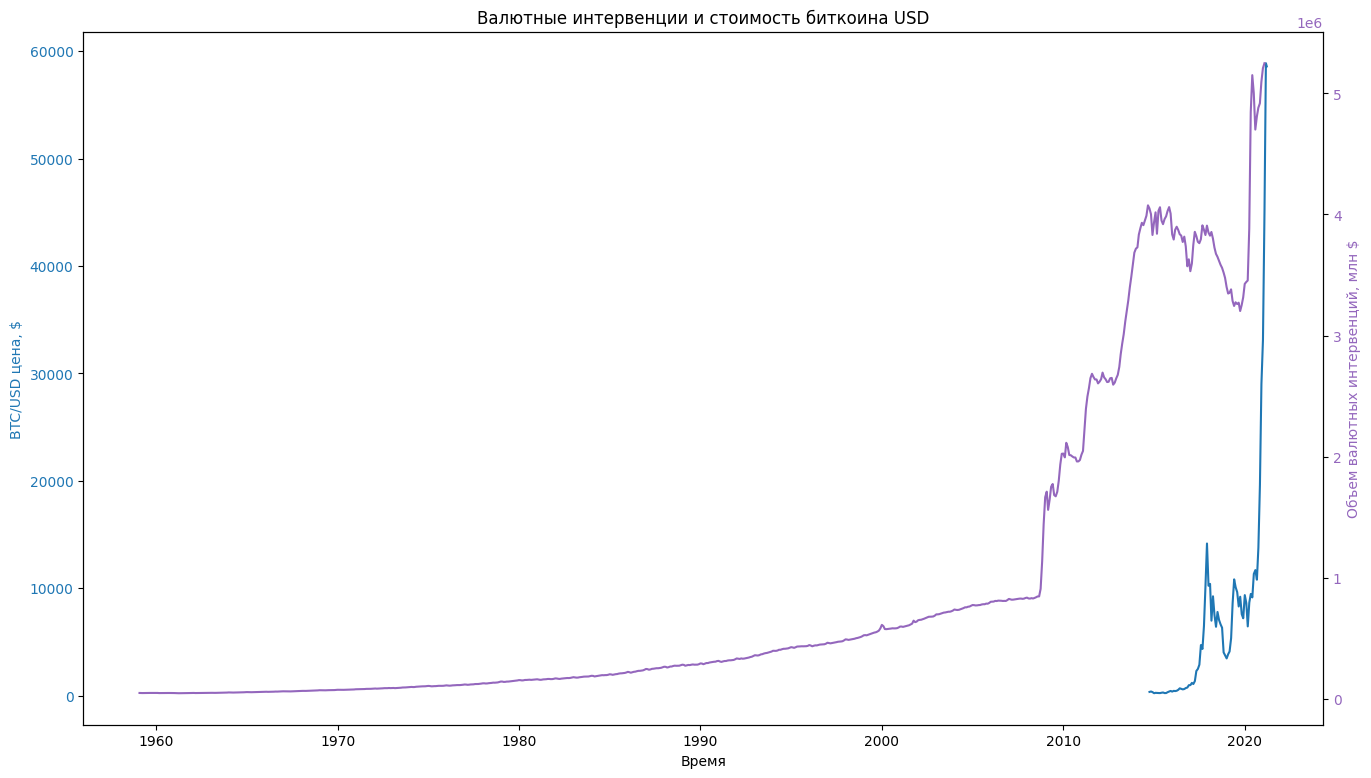

In [ ]:
# 1-2
# Для того, чтобы использовать парные оси y, перейдем к объектной форме
fig, ax1 = plt.subplots(figsize=(16,9))  # +

color = 'tab:blue' # +
ax1.set_xlabel('Время')  # +
ax1.set_ylabel('BTC/USD цена, $', color = color)  # +
ax1.plot(btc_usd_date, btc_usd_close, color = color) # +
ax1.tick_params(axis ='y', labelcolor = color)  # +

# Правая ось y будет для валютных интервенций
ax2 = ax1.twinx() # +

color = 'tab:purple' # +
ax2.set_ylabel('Объем валютных интервенций, млн $', color = color)  # +
ax2.plot(money_supply_date, money_supply_value, color = color)  # +
ax2.tick_params(axis ='y', labelcolor = color) # +

plt.title("Валютные интервенции и стоимость биткоина USD")

plt.show();

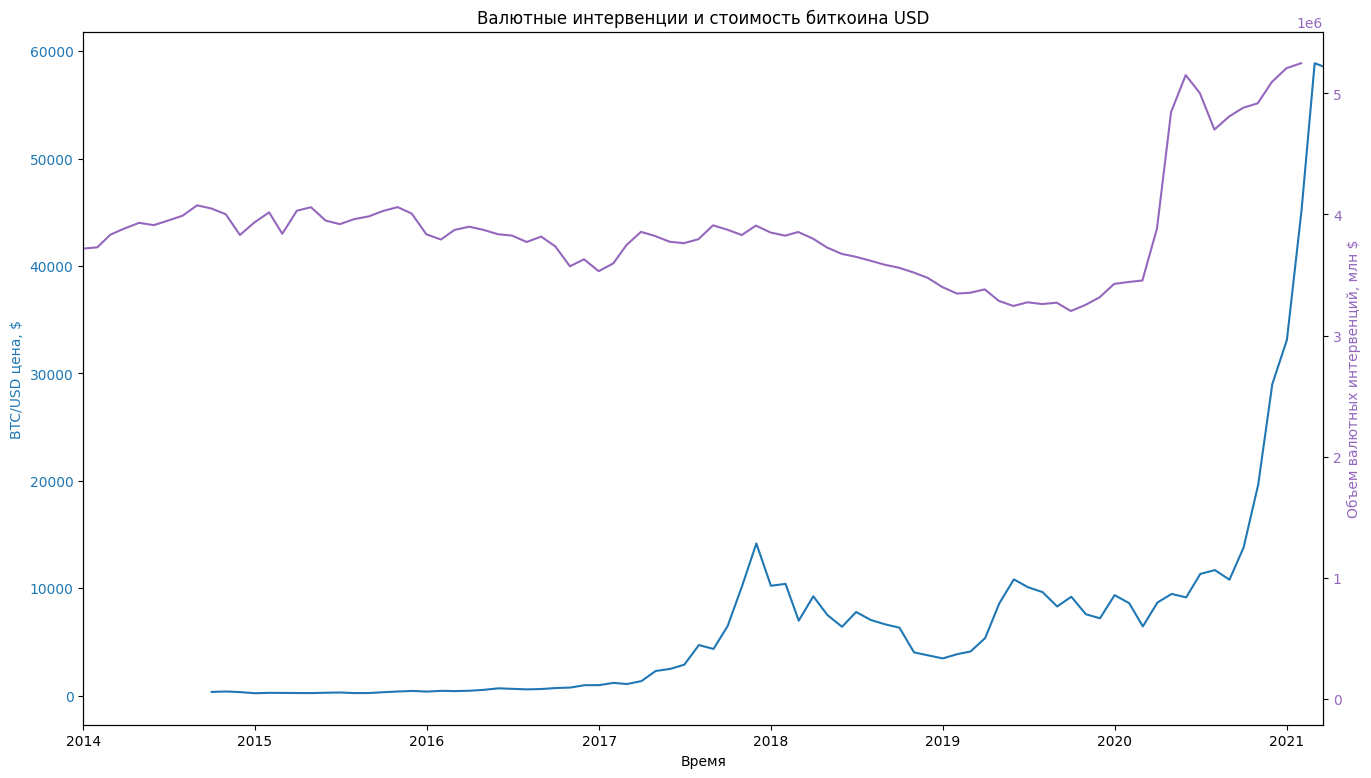

In [ ]:
# 3-4
fig, ax1 = plt.subplots(figsize=(16,9))

color = 'tab:blue'
ax1.set_xlabel('Время')
max_date = np.max(np.concatenate([btc_usd_date, money_supply_date])) # +
ax1.set_xlim(left=np.datetime64('2014-01-01'), right=max_date) # +
ax1.set_ylabel('BTC/USD цена, $', color = color)
ax1.plot(btc_usd_date, btc_usd_close, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:purple'
ax2.set_ylabel('Объем валютных интервенций, млн $', color = color)
ax2.plot(money_supply_date, money_supply_value, color = color)
ax2.tick_params(axis ='y', labelcolor = color)

plt.title("Валютные интервенции и стоимость биткоина USD")

plt.show()

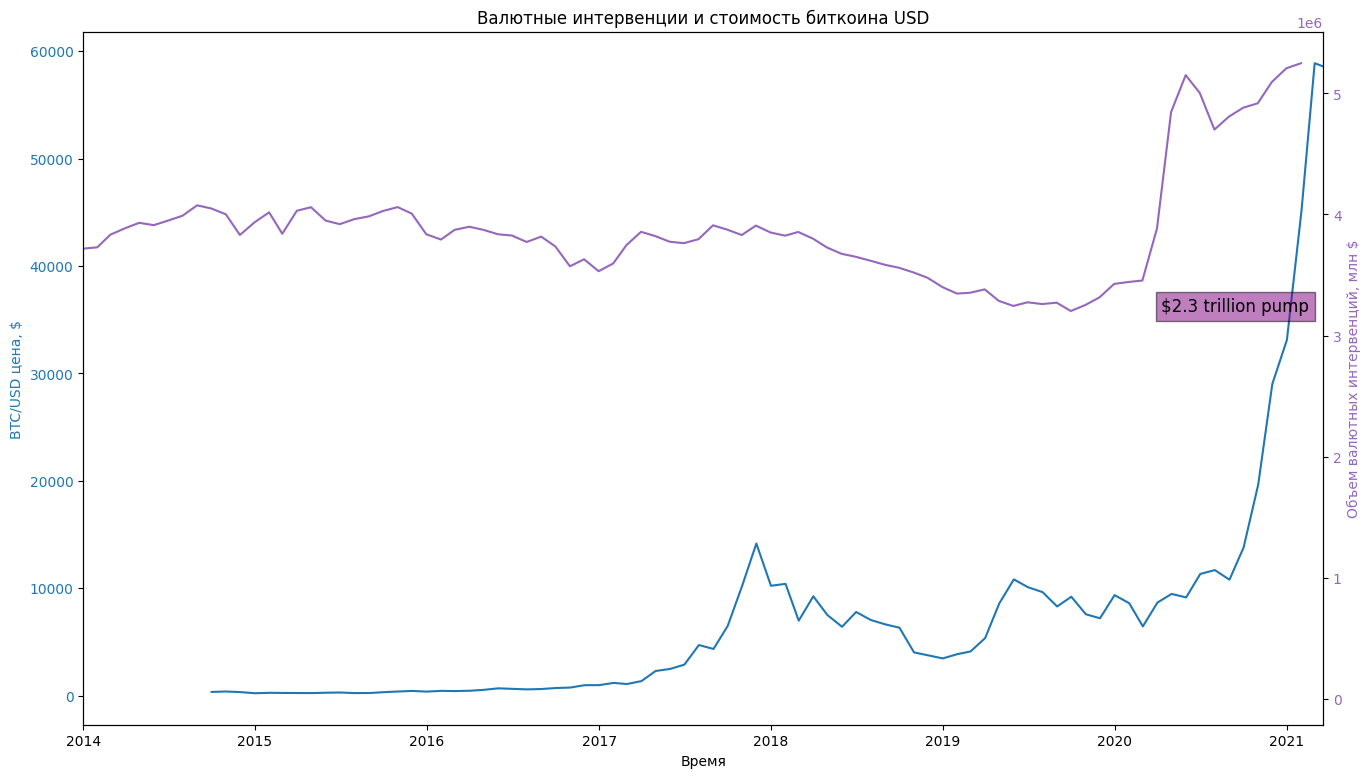

In [ ]:
# 5-6
fig, ax1 = plt.subplots(figsize=(16,9))

color = 'tab:blue'
ax1.set_xlabel('Время')
max_date = np.max(np.concatenate([btc_usd_date, money_supply_date]))
ax1.set_xlim(left=np.datetime64('2014-01-01'), right=max_date)
ax1.set_ylabel('BTC/USD цена, $', color = color)
ax1.plot(btc_usd_date, btc_usd_close, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:purple'
ax2.set_ylabel('Объем валютных интервенций, млн $', color = color)
ax2.plot(money_supply_date, money_supply_value, color = color)
ax2.tick_params(axis ='y', labelcolor = color)

plt.title("Валютные интервенции и стоимость биткоина USD")
plt.text(np.datetime64('2020-04-09'), 3.2e6, '$2.3 trillion pump', bbox=dict(facecolor='purple', alpha=0.5), fontsize=12) # +

plt.show()

In [ ]:
# # index of value for this date
# np.argwhere(money_supply_date == np.datetime64('2020-03-31')).flatten()
# money_supply_value[np.argwhere(money_supply_date == np.datetime64('2020-03-31')).flatten()]

array([3883155])

In [ ]:
# money_supply_value[np.argwhere(money_supply_date == np.datetime64('2020-06-30')).flatten()]

array([5001978])

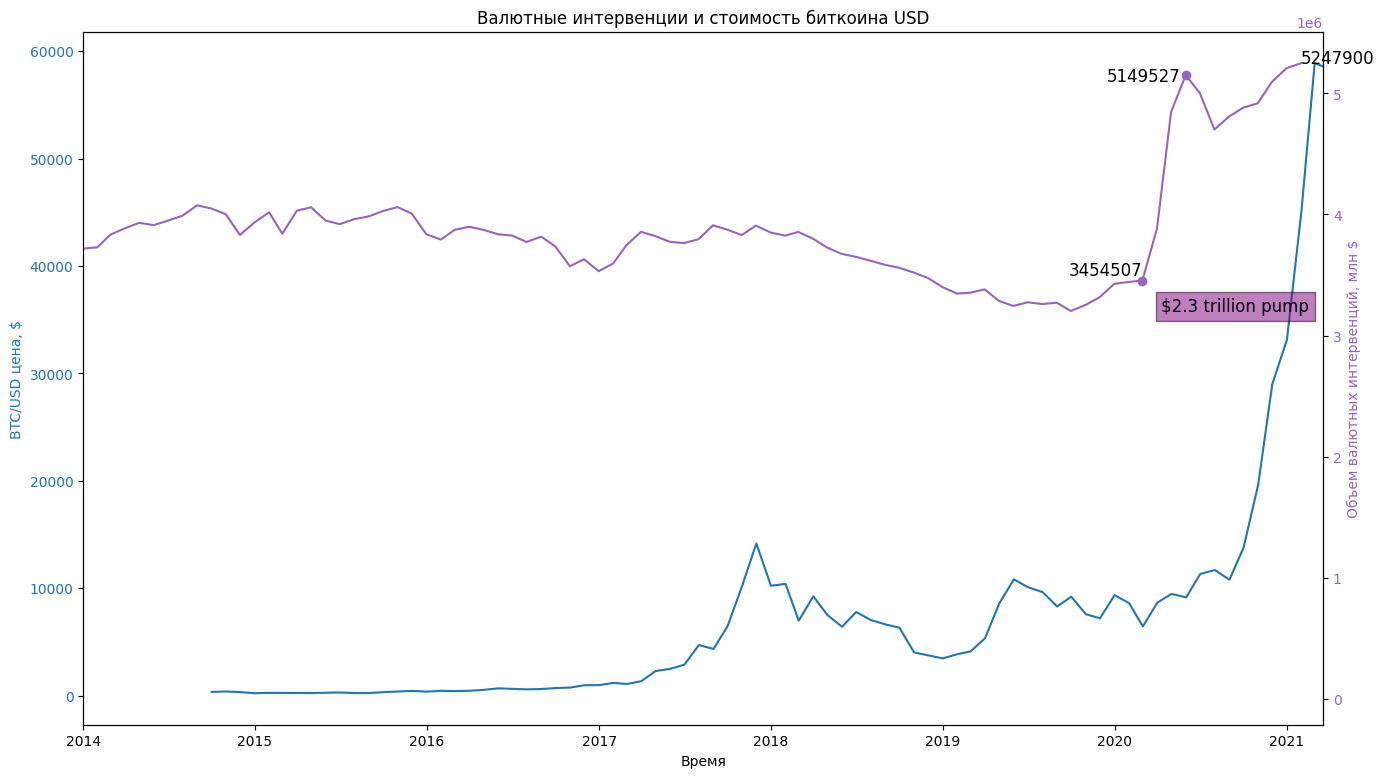

In [ ]:
# 7
def get_point_for_dt(date_arr: np.ndarray, value_arr: np.ndarray, dt: str): # +
  return value_arr[np.argwhere(date_arr == np.datetime64(dt)).flatten()] # +


fig, ax1 = plt.subplots(figsize=(16,9))

color = 'tab:blue'
ax1.set_xlabel('Время')
max_date = np.max(np.concatenate([btc_usd_date, money_supply_date]))
ax1.set_xlim(left=np.datetime64('2014-01-01'), right=max_date)
ax1.set_ylabel('BTC/USD цена, $', color = color)
ax1.plot(btc_usd_date, btc_usd_close, color = color)
ax1.tick_params(axis ='y', labelcolor = color)

# Правая ось y будет для валютных интервенций
ax2 = ax1.twinx()

color = 'tab:purple'
ax2.set_ylabel('Объем валютных интервенций, млн $', color = color)
ax2.plot(money_supply_date, money_supply_value, color = color)
ax2.scatter([np.datetime64('2020-02-29'), ], get_point_for_dt(money_supply_date, money_supply_value, '2020-02-29'), color=color) # +
ax2.scatter([np.datetime64('2020-05-31'), ], get_point_for_dt(money_supply_date, money_supply_value, '2020-05-31'), color=color) # +
ax2.tick_params(axis ='y', labelcolor = color)

plt.title("Валютные интервенции и стоимость биткоина USD")
plt.text(np.datetime64('2020-04-09'), 3.2e6, '$2.3 trillion pump', bbox=dict(facecolor='purple', alpha=0.5), fontsize=12)
plt.text(np.datetime64('2019-09-25'), # +
         3.5e6, f"{get_point_for_dt(money_supply_date, money_supply_value, '2020-02-29')[0]}",  # +
         fontsize=12) # +

plt.text(np.datetime64('2019-12-15'), # +
         5.1e6, f"{get_point_for_dt(money_supply_date, money_supply_value, '2020-05-31')[0]}", # +
         fontsize=12) # +

plt.text(money_supply_date[list(money_supply_value).index(max(money_supply_value))], # +
         max(money_supply_value), f"{get_point_for_dt(money_supply_date, money_supply_value, money_supply_date[list(money_supply_value).index(max(money_supply_value))])[0]}",  # +
         fontsize=12) # +

plt.show()

И на слайд с графиком можно приложить ссылку "на почитать".

https://www.nytimes.com/2020/04/09/business/economy/fed-economic-rescue-coronavirus.html

Не забудем про то, что корреляция, конечно, не означает причинно-следственную связь:)

Но в целях выдвижения каких-то первичных гипотез и формирования выводов — наш обновленный график уж явно будет поприятнее :))

## Раздел 4. Библиотека Seaborn

Библиотека Seaborn представляет собой расширение над Matplotlib. Она добавляет полезных графиков, которые выглядят довольно-таки симпатично!

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

### Тепловые карты в Seaborn vs Matplotlib


Для демонстрации используем наш любимый датасет с ирисами!

In [ ]:
IRIS = 'https://github.com/evgpat/datasets/raw/refs/heads/main/iris.csv'

In [ ]:
iris = pd.read_csv(IRIS, header='infer')

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


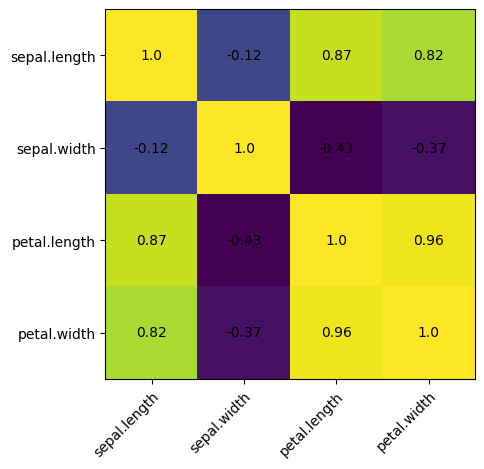

In [ ]:
# get correlation matrix
corr = iris.corr(numeric_only = True)
fig, ax = plt.subplots()

# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

<Axes: >

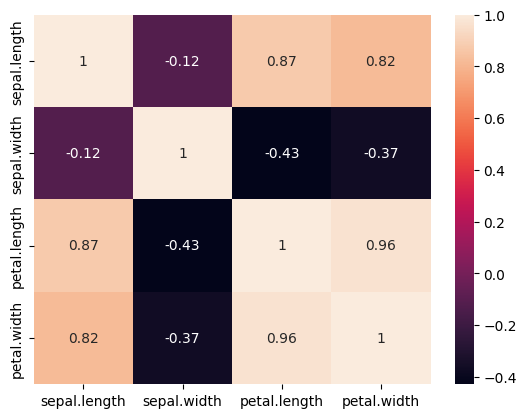

In [ ]:
sns.heatmap(iris.corr(numeric_only = True), annot=True);

Неплохо, да? :)

А еще можно изменить палитру: попробуйте зима, осень, весна, лето и другие! :)

In [ ]:
sns.heatmap(iris.corr(numeric_only = True), cmap = 'coolwarm', annot=True)

### Визуализация распределений в Seaborn

Визуализация распределений метрических переменных может осуществляться например с помощью:

*   displot
*   jointplot
*   rugplot
*   kdeplot

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


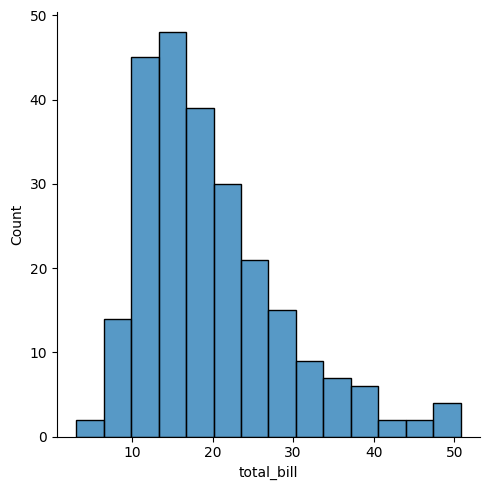

In [ ]:
sns.displot(tips['total_bill']);

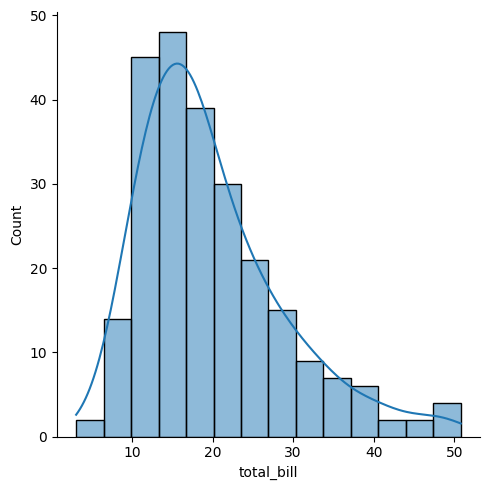

In [ ]:
sns.displot(tips['total_bill'], kde=True);

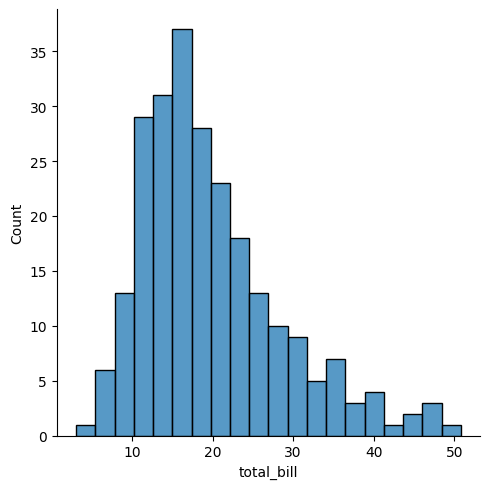

In [ ]:
sns.displot(tips['total_bill'], bins=20);

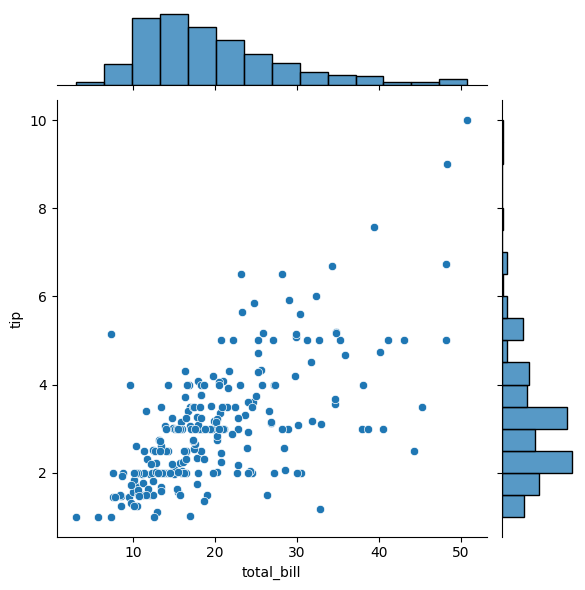

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter');

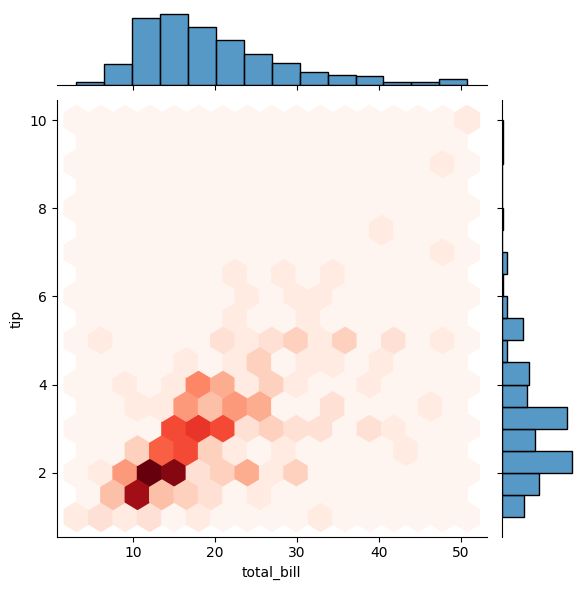

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex', cmap = 'Reds');

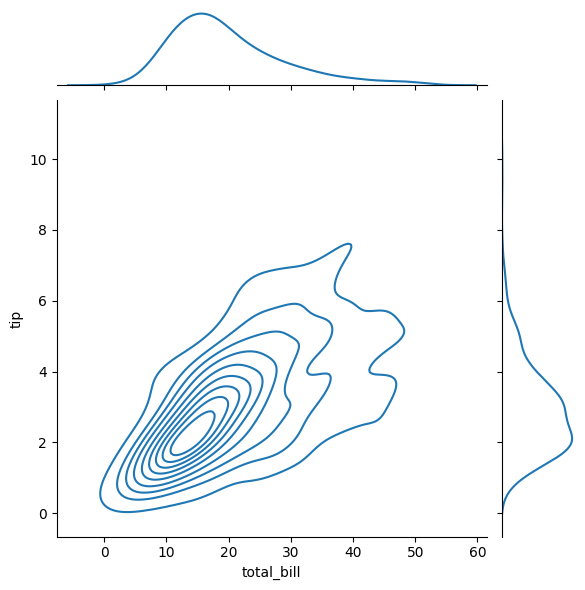

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde');

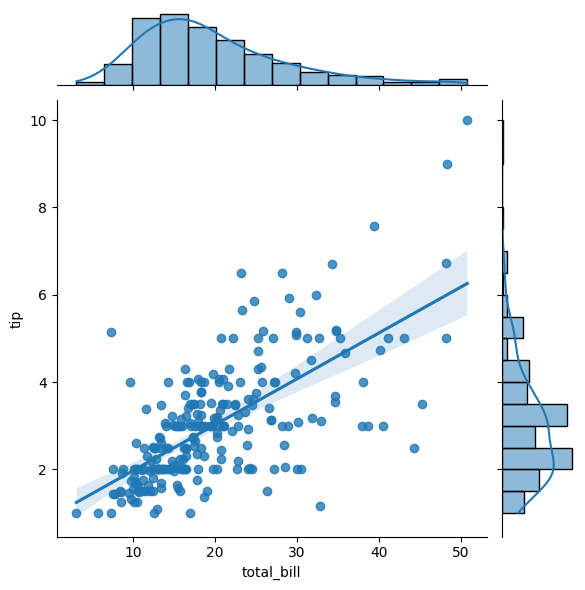

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

### Парные относительные визуализации

Для визуализации относительных распределений между парами переменных

*   PairGrid
*   pairplot
*   FacetGrid

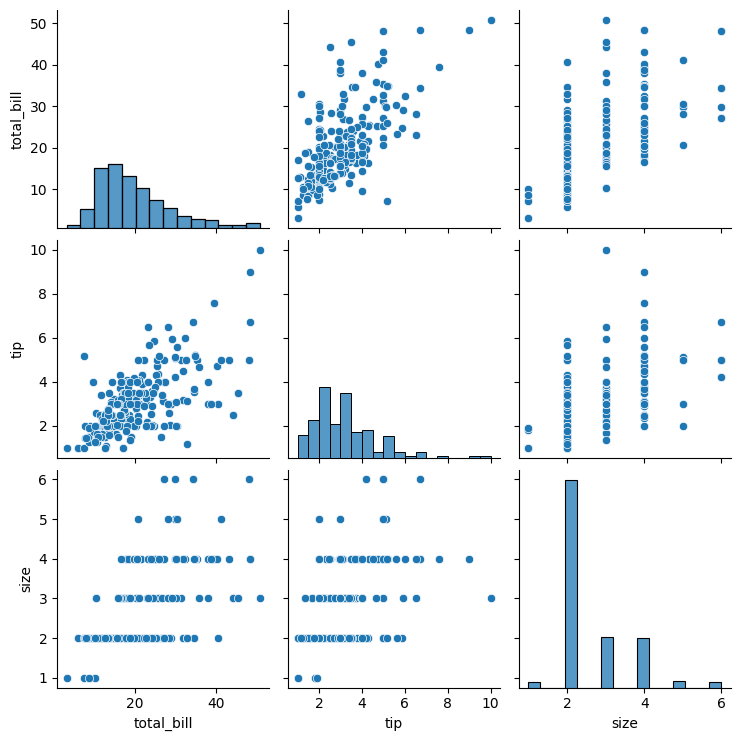

In [ ]:
sns.pairplot(tips);

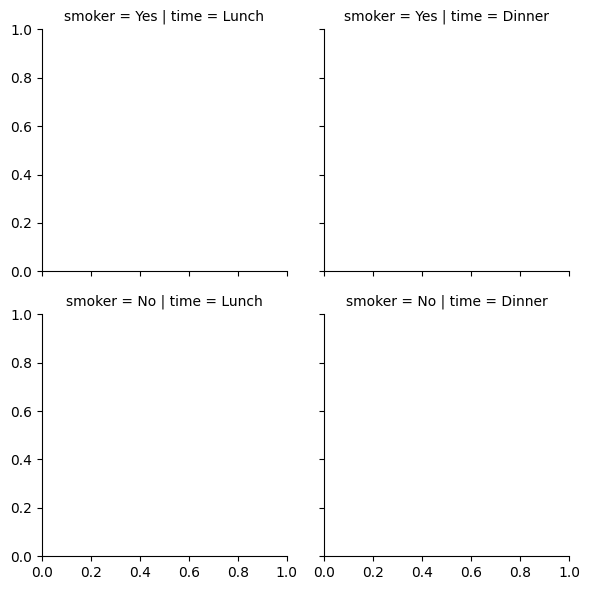

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker"); # просто задали оси пока что

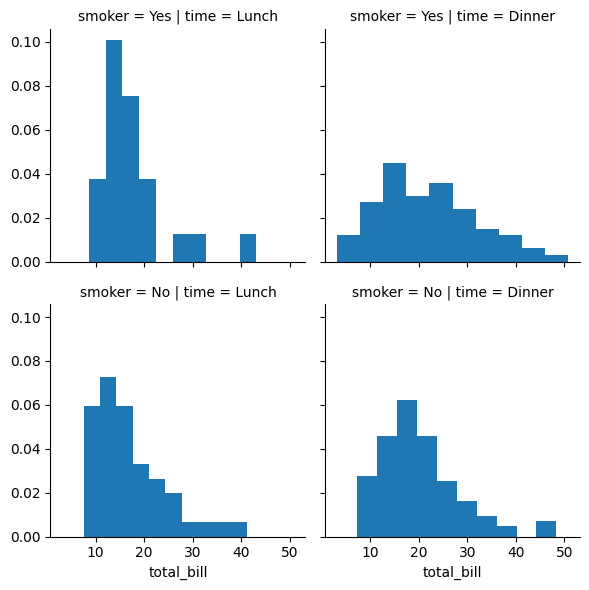

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill", density=True) # функция для отрисовки, а затем через запятую все параметры как для функции отрисовки в отдельности

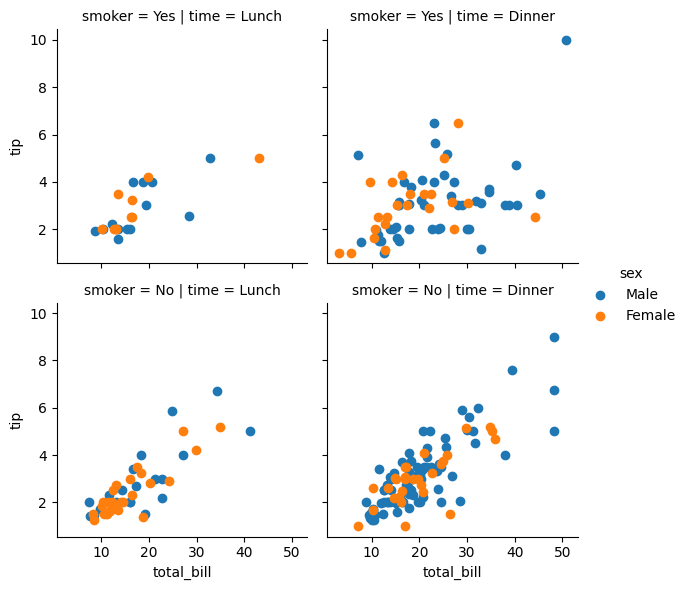

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker", hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

#### Вопрос

Скольки-мерная визуализация и почему была представлена в последнем примере? Не спешите с ответом, внимательно посчитайте.

#### Вопрос

Какие выводы мы можем сделать из этого графика? Давайте поиграем в аналитиков, предложите ваши версии!

### Визуализации категориальных данных

Для визуализации категориальных данных:

*  factorplot
*  boxplot
*  violinplot
*  stripplot
*  swarmplot
*  barplot
*  countplot

![интерквартильный размах](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

<Axes: xlabel='sex', ylabel='total_bill'>

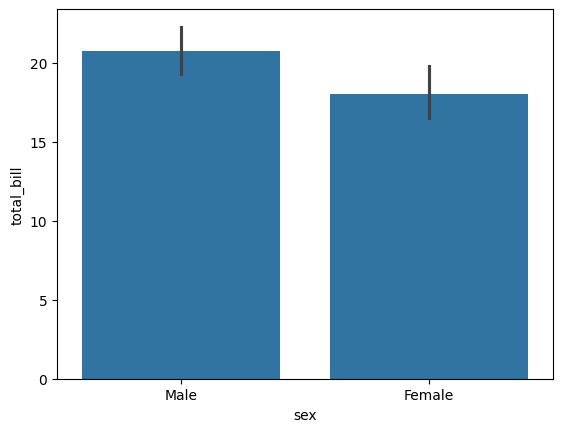

In [ ]:
# barplot, countplot
sns.barplot(x='sex', y='total_bill', data=tips);

<Axes: xlabel='sex', ylabel='total_bill'>

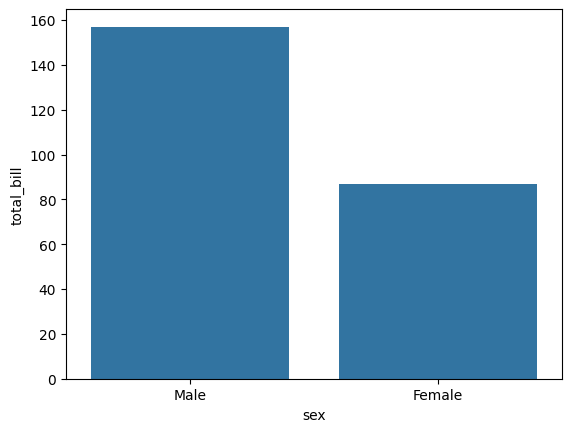

In [ ]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=len); # того же самого можем добиться используя сразу функцию countplot

<Axes: xlabel='sex', ylabel='count'>

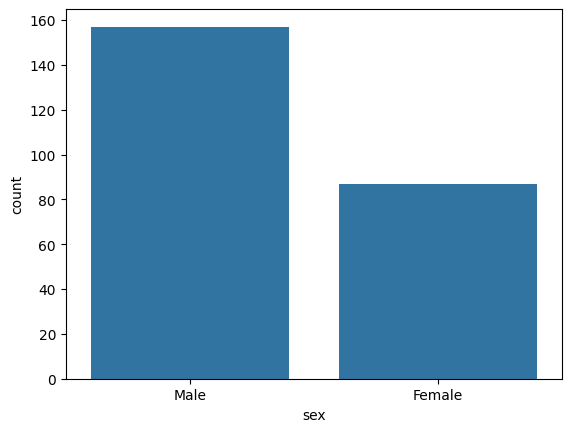

In [ ]:
sns.countplot(x='sex', data=tips);

<Axes: xlabel='day', ylabel='total_bill'>

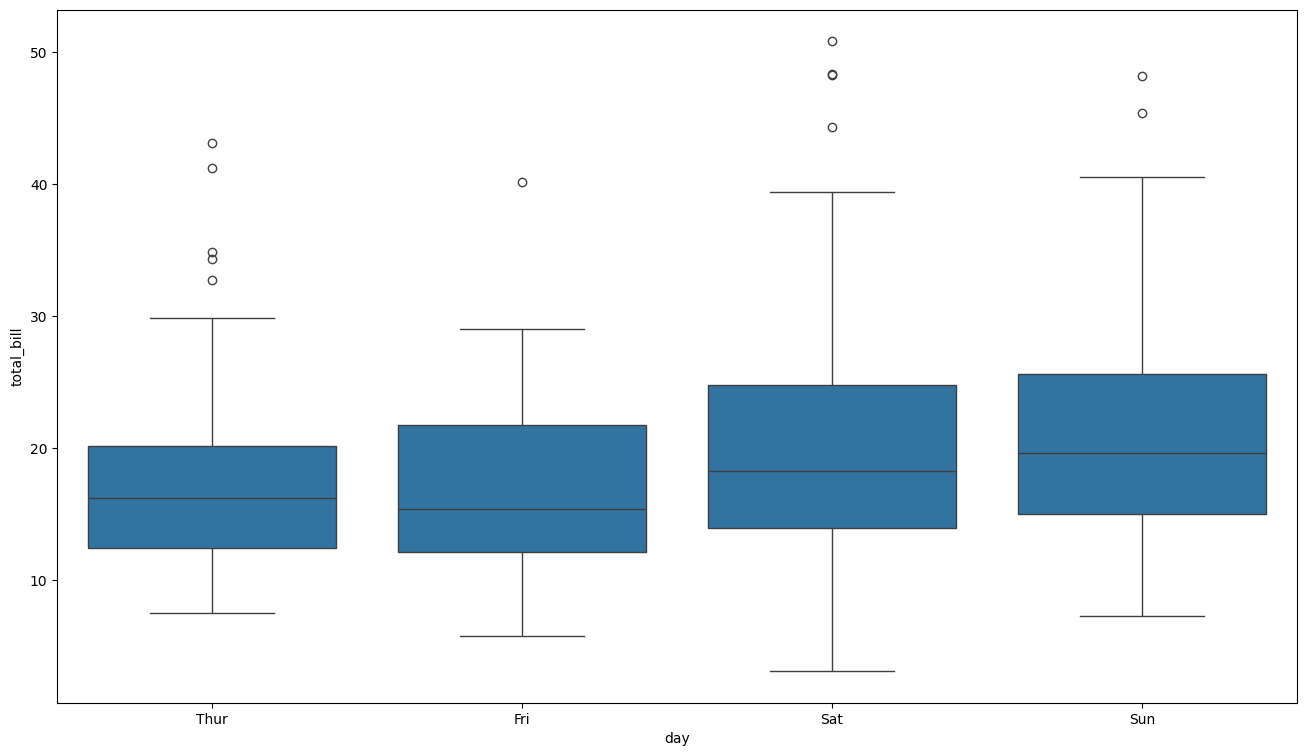

In [ ]:
# boxplot
plt.figure(figsize=(16,9))
sns.boxplot(x='day', y='total_bill', data=tips);

<Axes: xlabel='day', ylabel='total_bill'>

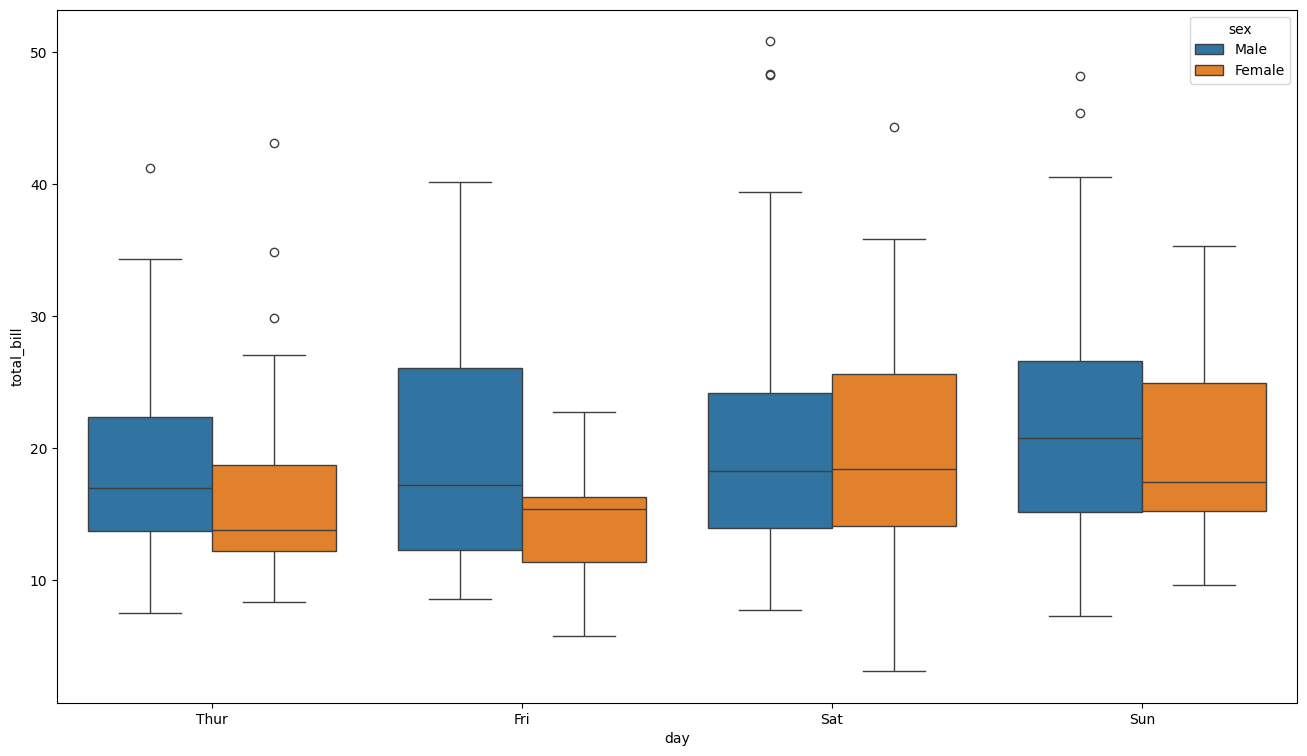

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex');

<Axes: xlabel='day', ylabel='total_bill'>

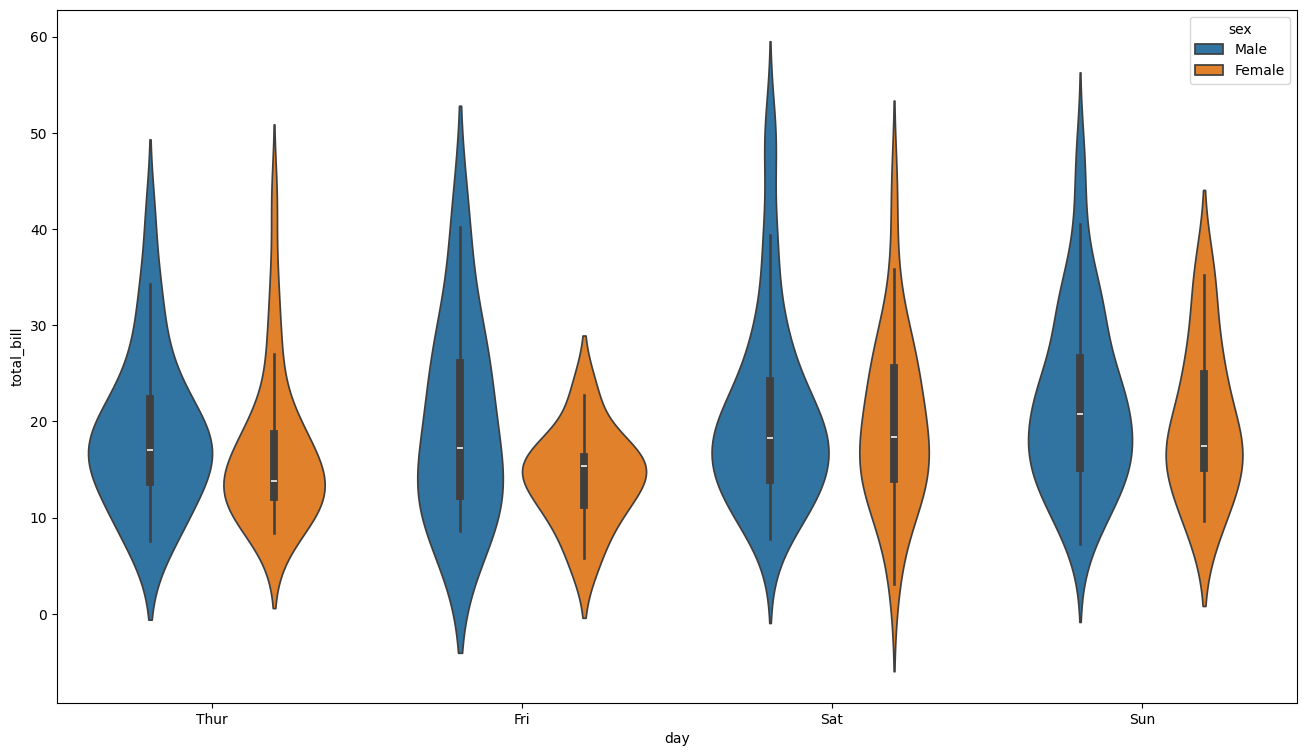

In [ ]:
# violinplot
plt.figure(figsize=(16,9))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex');

<Axes: xlabel='day', ylabel='total_bill'>

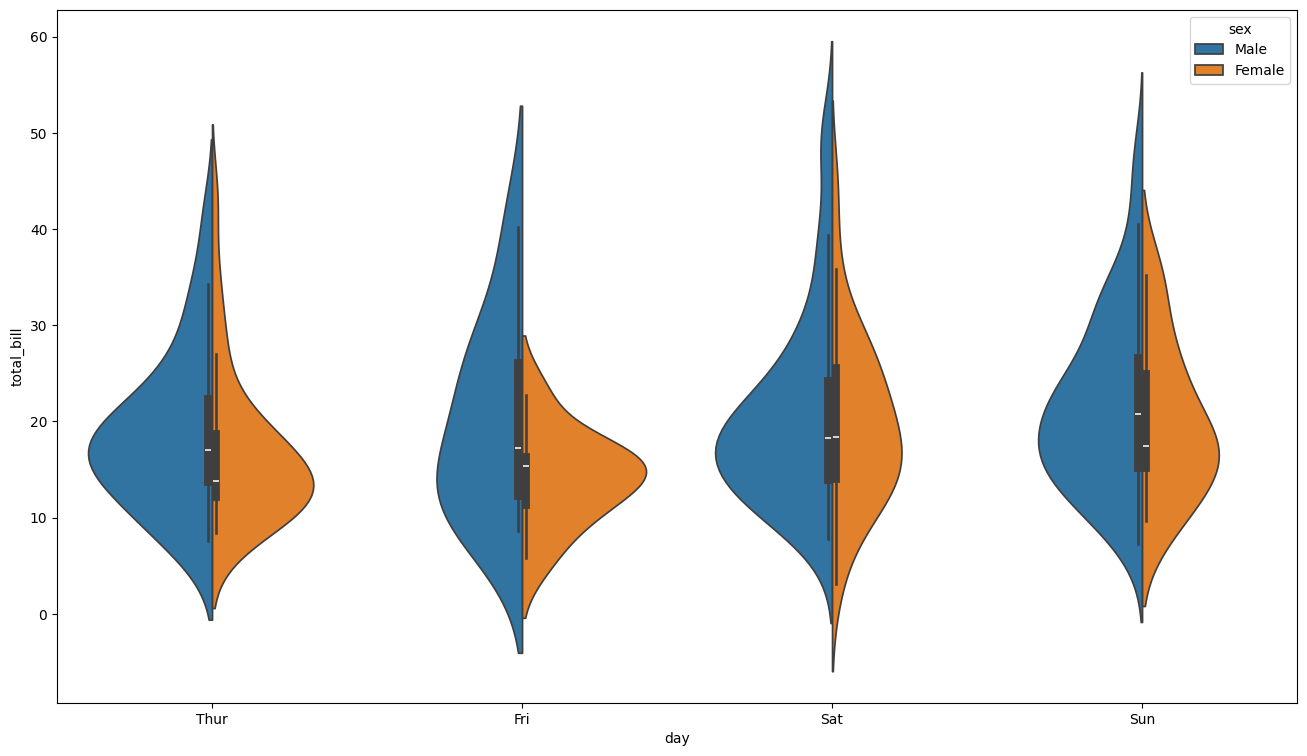

In [ ]:
plt.figure(figsize=(16,9))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True);

### Визуализации со сводными таблицами

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Посчитаем таблицу сопряженности, которая покажет, какое кол-во пассажиров летало в различные месяцы в каждый из годов в промежутке от 1949 по 1960.

In [ ]:
pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')
pvflights;

<ipython-input-63-7862418cb9a4>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


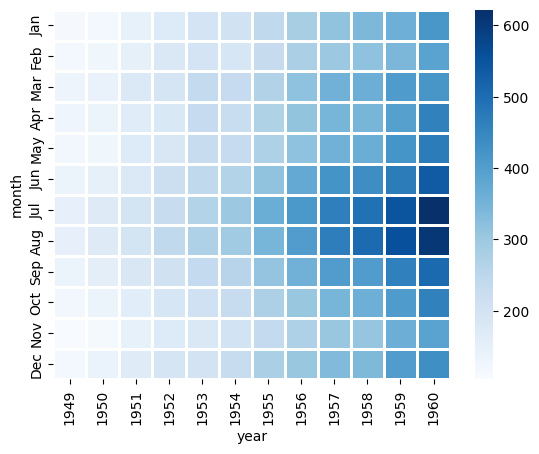

In [ ]:
sns.heatmap(pvflights, linecolor = 'white', linewidths = 1, cmap = 'Blues'); #можно еще попробовать палитру Blues, Greens

Подводя итог, это всё — лишь вершина айсберга!

Запомнить все это невозможно, но вы должны быть в курсе базовых возможностей и знать, где смотреть. Конечно же, не стесняемся гуглить!

С практикой и опытом вы запомните большую часть того, о чем говорится в данном руководстве!